# Super Store Order Data Analysis
In this notebook I'll do an exploratory data analysis on a super store order data
The dataset I took from kaggle: https://www.kaggle.com/aditisaxena20/superstore-sales-dataset

### Task showed in this notebook
1. Loading dataset
2. Explore & clean data
3. Doing analysis with different features of the dataset

#### First let's import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

# set styling for this notebook
pd.set_option('display.max_columns', None)
sns.set_theme(context='notebook', style = 'darkgrid')
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Loading the dataset

In [3]:
df = pd.read_csv('F:/Course/Project_1/SuperStore_Orders.csv')

# Let's have a quick look at the data set
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


.

### Exploring Dataset

In [4]:
# check for the size of the data set
print(df.shape)

# and also let's have a quick looks about the feature info and datatype of features
df.info()

(51290, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          512

Here most of the data types are object type but some of should be in different type. Like
(order_date & ship_date) should be in datetime format
(ship_mode, segment, order_priority, etc) should be in category type
(sales should be in float or interger type)

Let's convert these features into the following datatype

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

df['ship_mode'] = df['ship_mode'].astype('category')
df['segment'] = df['segment'].astype('category')
df['order_priority'] = df['order_priority'].astype('category')

In [6]:
# In sales column there is "1,648" is not a valid integer because of (,) inside the value
# Let's take care of it and convert it into float type

df["sales"] = df['sales'].str.replace(',', '').astype(float)

In [7]:
# Let's check the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  category      
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  category      
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

We've done this data type conversions.

###### Now let's checck for the null values or missing value in the data set

In [8]:
df.isnull().mean()

order_id          0.0
order_date        0.0
ship_date         0.0
ship_mode         0.0
customer_name     0.0
segment           0.0
state             0.0
country           0.0
market            0.0
region            0.0
product_id        0.0
category          0.0
sub_category      0.0
product_name      0.0
sales             0.0
quantity          0.0
discount          0.0
profit            0.0
shipping_cost     0.0
order_priority    0.0
year              0.0
dtype: float64

<AxesSubplot:>

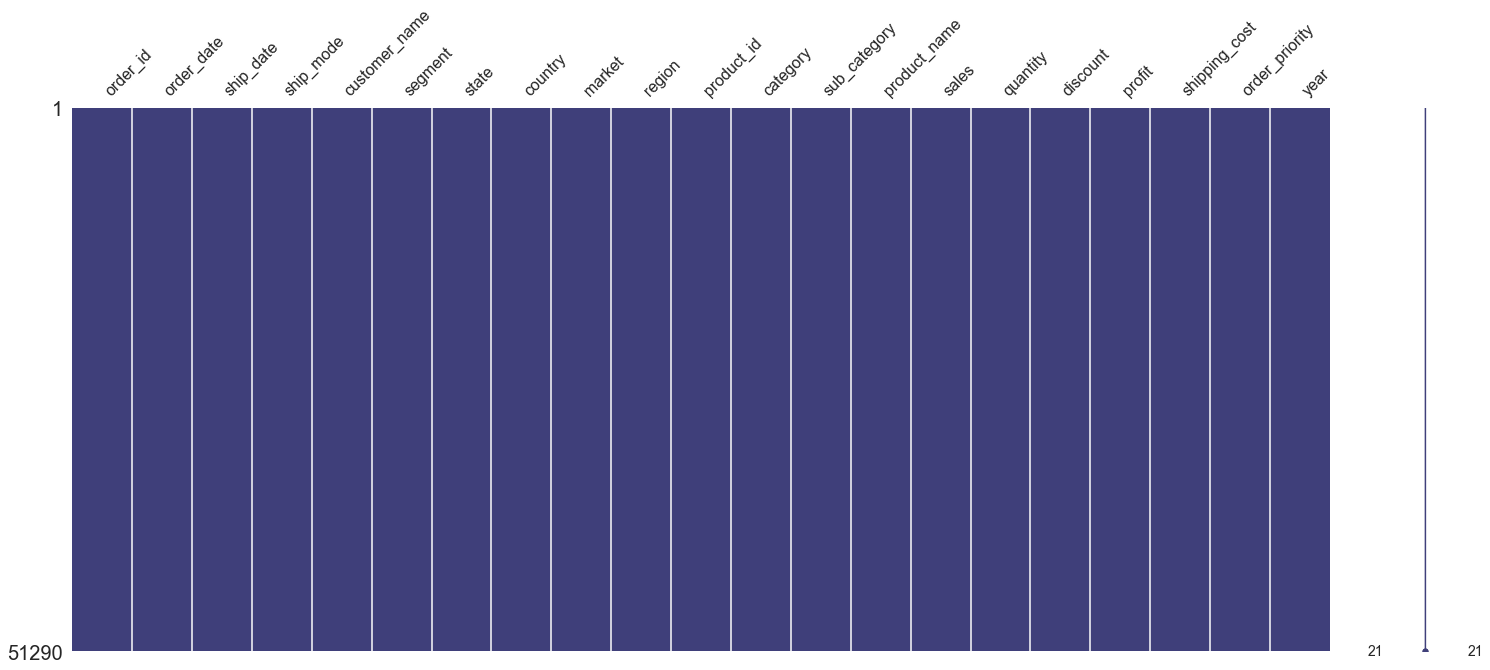

In [9]:
# check missing value with visualization

mno.matrix(df, color=(0.25, 0.25, 0.48))

There is no missing data.
Now let's analyze the data.

## Exploratory Data Analysis (EDA)

In [10]:
# Let's first start with year over quantity sold and sales

qty_sold_per_year = df.groupby('year')['quantity'].sum()
qty_sold_per_year.sort_values(ascending = False)

year
2014    60622
2013    48136
2012    38111
2011    31443
Name: quantity, dtype: int64

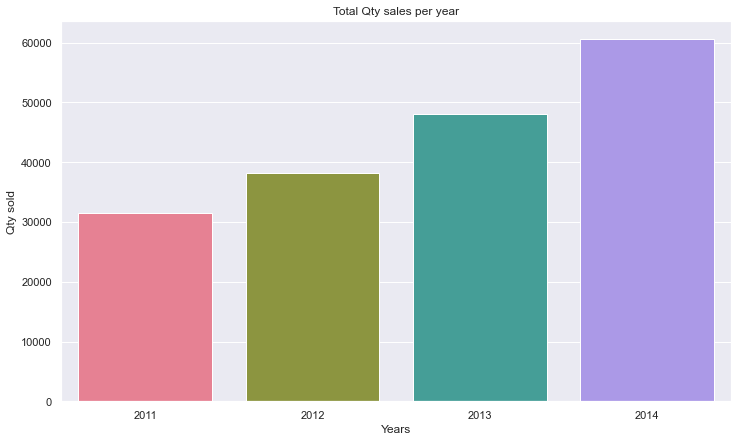

In [11]:
# We can see that in 2014 highest quantity sold
# Let's visualize the growth with a barplot

years = df['year'].unique()

plt.figure(figsize=(12,7))
sns.barplot(x = years, y = qty_sold_per_year.values, palette= 'husl')
plt.title('Total Qty sales per year')
plt.xlabel('Years')
plt.ylabel('Qty sold')
plt.show()

We can clearly see that the quantity sales is gradually increasing over years.
And in 2014 has the highest quantity sold

Now let's check sales and profits over years

In [12]:
# let's chekc total sales and profit per year

sale = df.groupby('year')['sales'].sum()
profits = df.groupby('year')['profit'].sum()
print('sales: {}'.format(sale.sort_values(ascending=False)))
print('\n')
print('Profit: {}'.format(profits.sort_values(ascending=False)))

sales: year
2014    4300041.0
2013    3405860.0
2012    2677493.0
2011    2259511.0
Name: sales, dtype: float64


Profit: year
2014    504165.97046
2013    408512.76018
2012    307415.27910
2011    248940.81154
Name: profit, dtype: float64


Got an expected sales and profit. As in 2014 has the highest quantity sold so the profit in 2014 is high.

Let's visualize this with a bar plot for better understanding

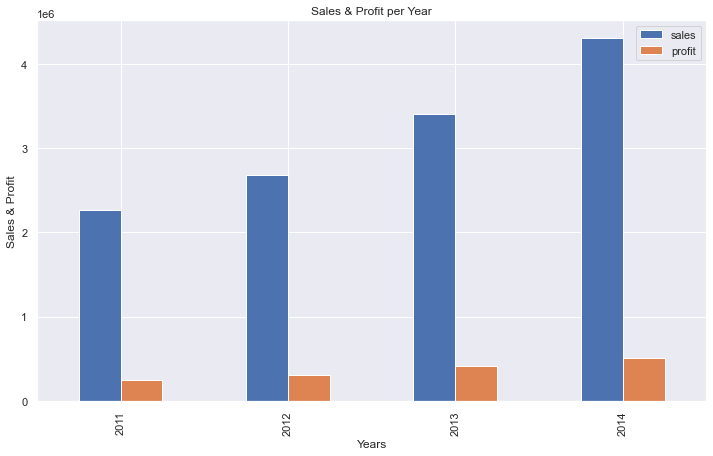

In [13]:
# ploting sales & profit with respect to year

sales_profit = df.groupby('year')[['sales', 'profit']].sum()
sales_profit.plot(kind = 'bar', figsize=(12,7))
plt.title('Sales & Profit per Year')
plt.xlabel('Years')
plt.ylabel('Sales & Profit')
plt.show()

The visualizatoin show that in 2014 the sales and profit was highest.

Let's visualize the sales & profit based on different category

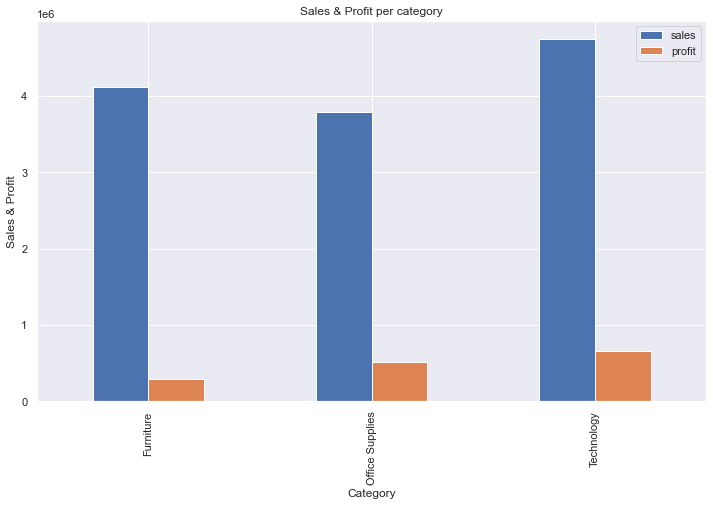

In [14]:
# now let's analyze the sales and profit with category


viz_cat = df.groupby('category')[['sales', 'profit']].sum()
viz_cat.plot(kind = 'bar', figsize=(12,7))
plt.title('Sales & Profit per category')
plt.xlabel('Category')
plt.ylabel('Sales & Profit')
plt.show()

Here the Technology category has generated the highest sales and profit.
The furniture category has 2nd highest sales but 3rd highest profit
and the office supplies has 3rd hgihest sales but 2nd highest profit.

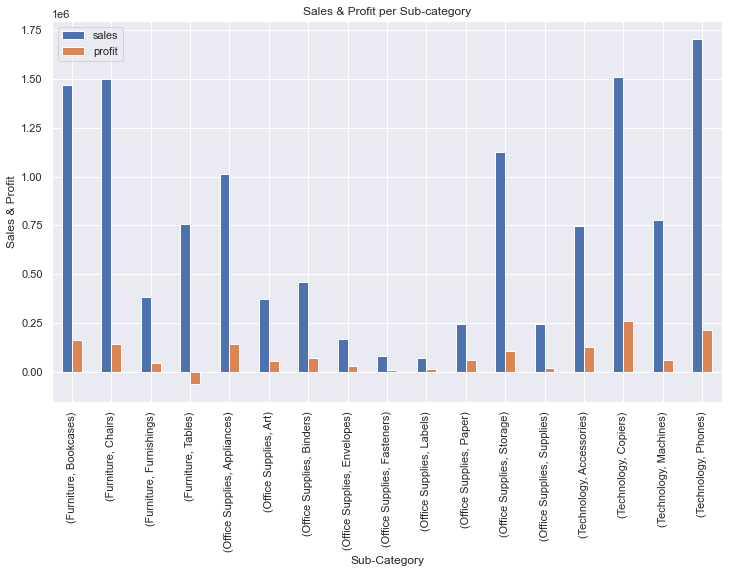

In [15]:
# now let's analyze the sales and profit with sub_category


viz_sub_cat = df.groupby(['category','sub_category'])[['sales', 'profit']].sum()
viz_sub_cat.plot(kind = 'bar', figsize=(12,7))
plt.title('Sales & Profit per Sub-category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales & Profit')
plt.show()

 We can see the top 3 sub-category with highest sales and profit is "Phone, Copiers, Chairs and Bookcases" and their parent category is technology and furniture. and the coppiers generates the highest profit.

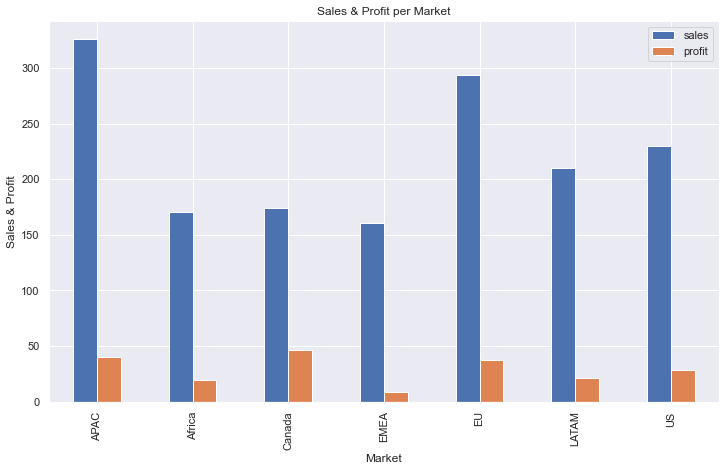

In [16]:
# Now Let's check the sales and profit with market

viz_mart = df.groupby('market')[['sales', 'profit']].mean()
viz_mart.plot(kind = 'bar', figsize=(12,7))
plt.title('Sales & Profit per Market')
plt.xlabel('Market')
plt.ylabel('Sales & Profit')
plt.show()

Here we can see that the APAC and EU has the highest sales and US market is third for highest sales. and Canada market generate highest profit.

### Let's analyze the market based on category and sub-category

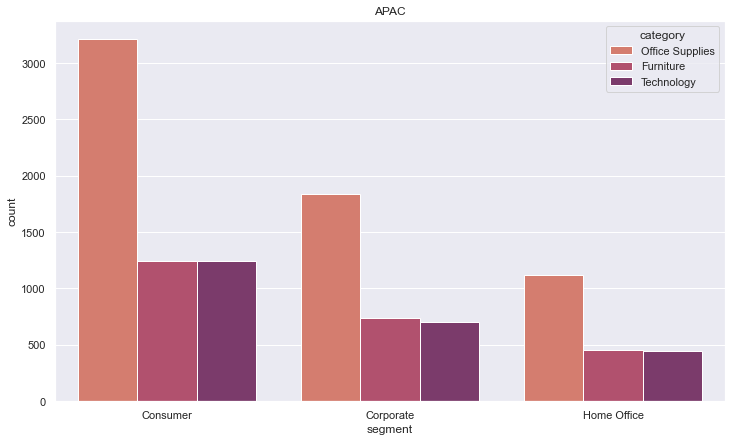

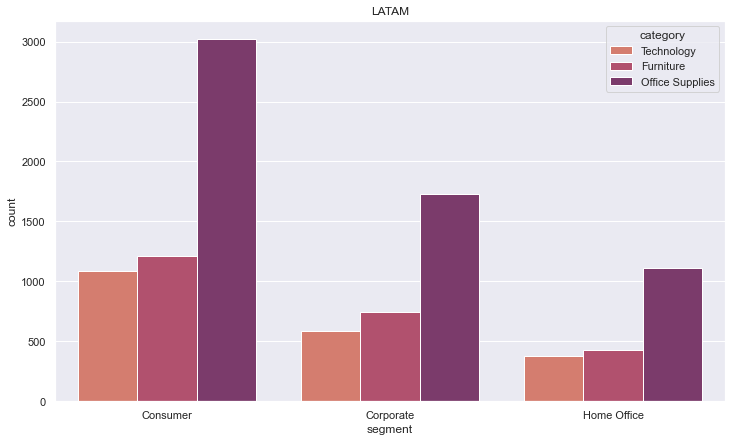

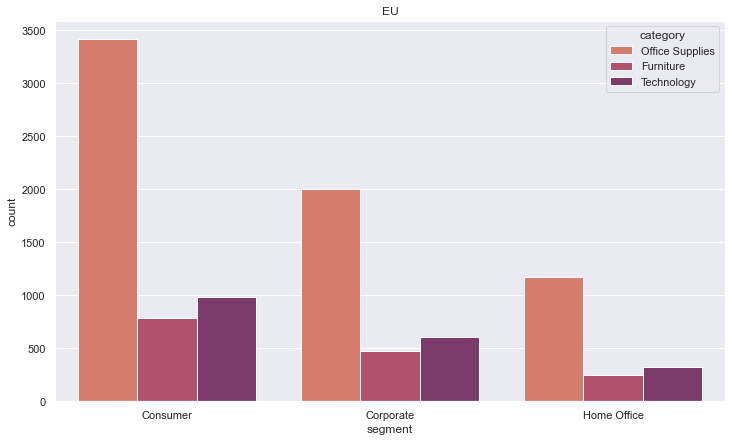

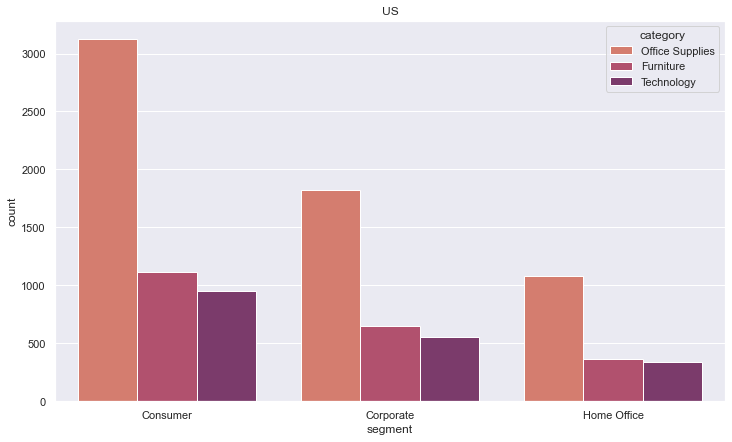

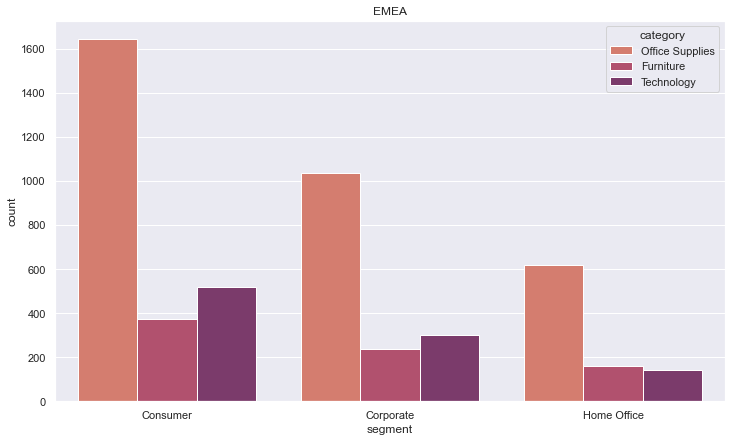

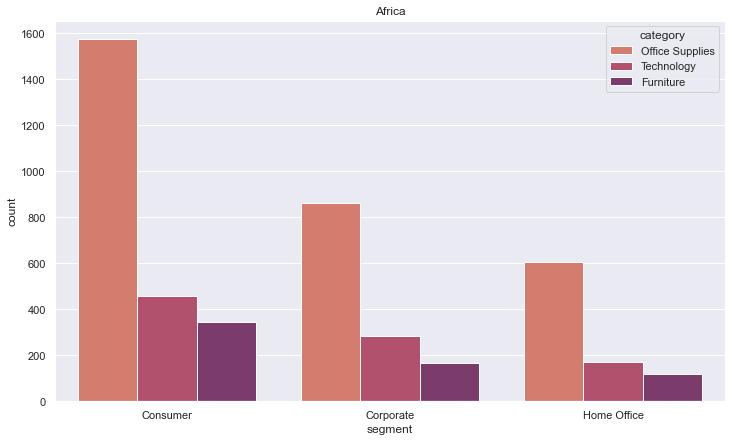

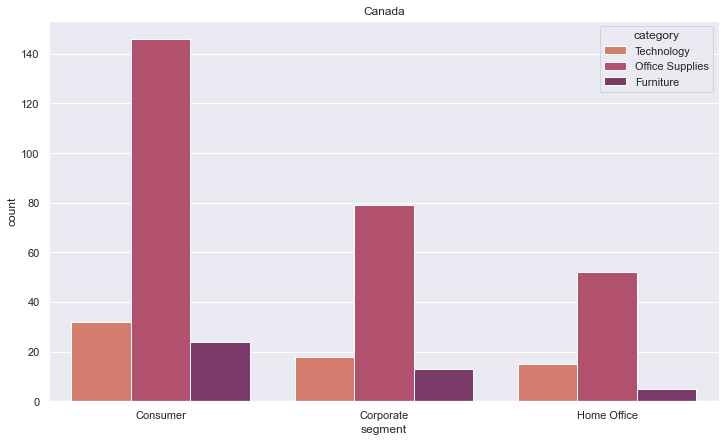

In [17]:
# Let's create a market segment based on customer and category
markets = df['market'].value_counts().keys()

for market in markets:
    market_list=df[df["market"]==market]
    plt.figure(figsize=(12,7))
    plt.title(market)
    sns.countplot(x = market_list["segment"], hue = market_list["category"], palette= 'flare')
    plt.show()

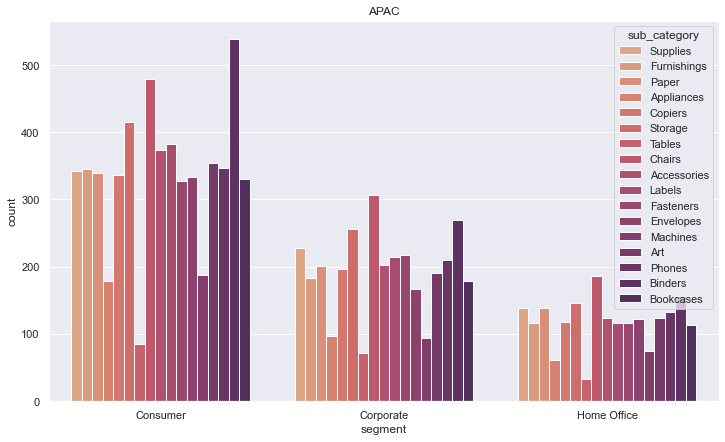

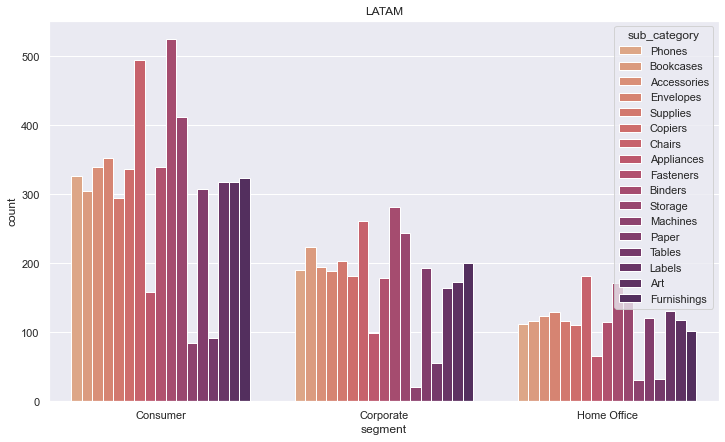

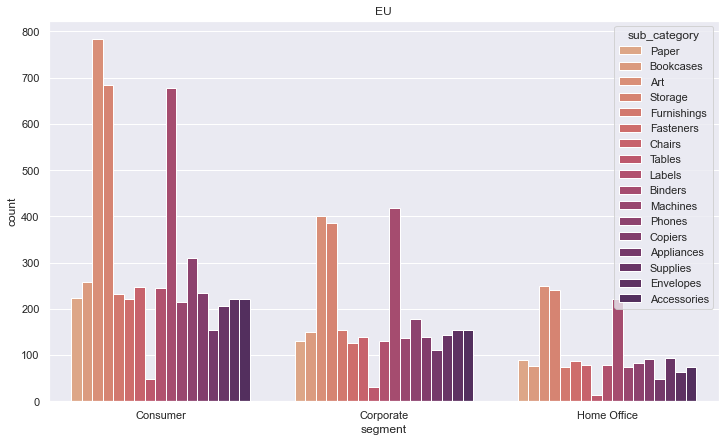

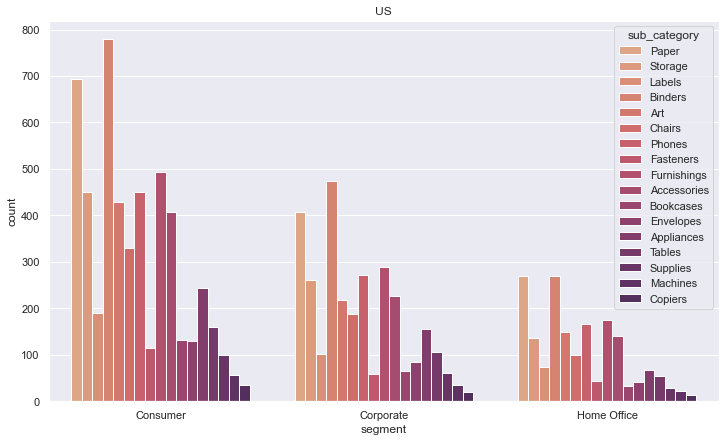

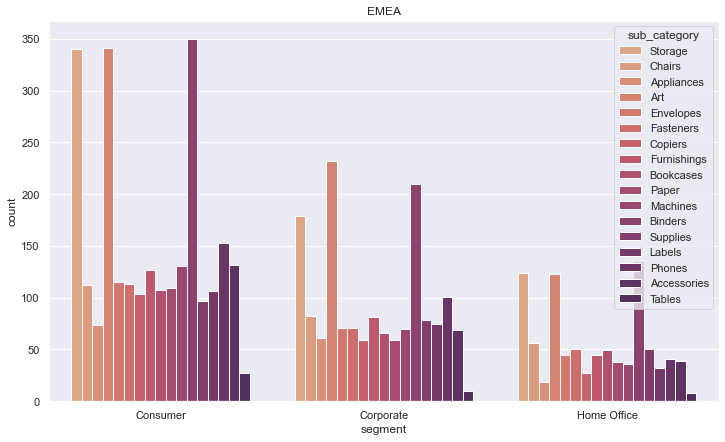

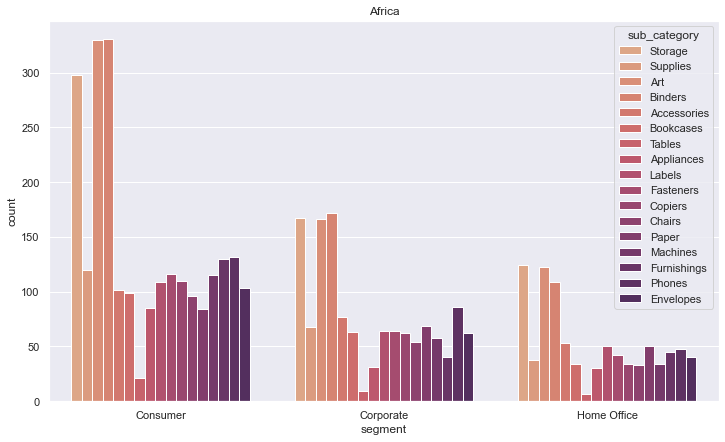

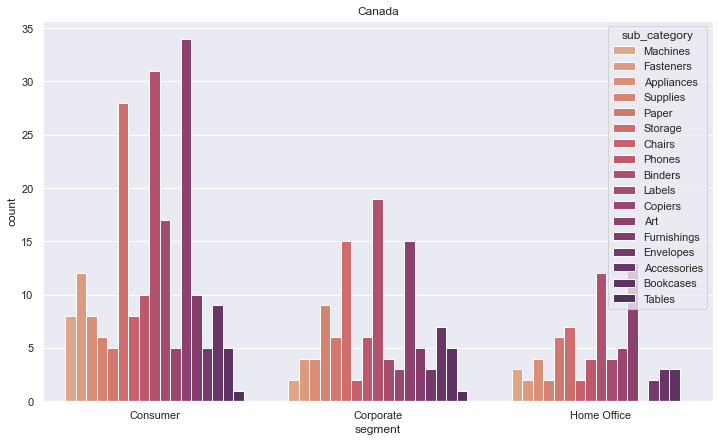

In [18]:
# Let's create a market segment based on customer and sub-category
markets = df['market'].value_counts().keys()

for market in markets:
    market_list=df[df["market"]==market]
    plt.figure(figsize=(12,7))
    plt.title(market)
    sns.countplot(x = market_list["segment"], hue = market_list["sub_category"], palette= 'flare')
    plt.show()

Let's check the order priority and shipping mode based on category and sub-category

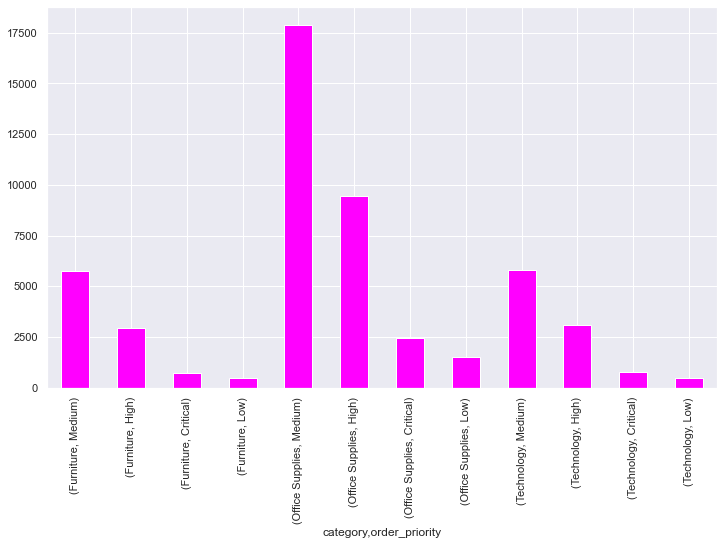

In [19]:
# visualize order priority according to category

order_prio_cat = df.groupby('category')['order_priority'].value_counts()
order_prio_cat.plot(kind = 'bar', figsize = (12,7), colormap = 'spring')
plt.show()

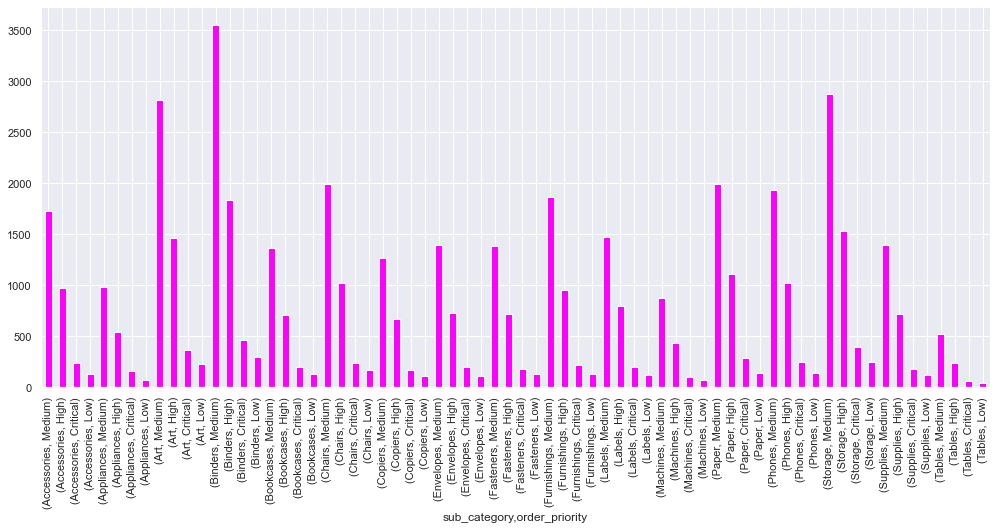

In [20]:
# visualize order priority according to sub-category

order_prio_sub = df.groupby('sub_category')['order_priority'].value_counts()
order_prio_sub.plot(kind = 'bar', figsize = (17,7), colormap = 'spring')
plt.show()

Here in both plot we can see the highest count of order priority is medium.

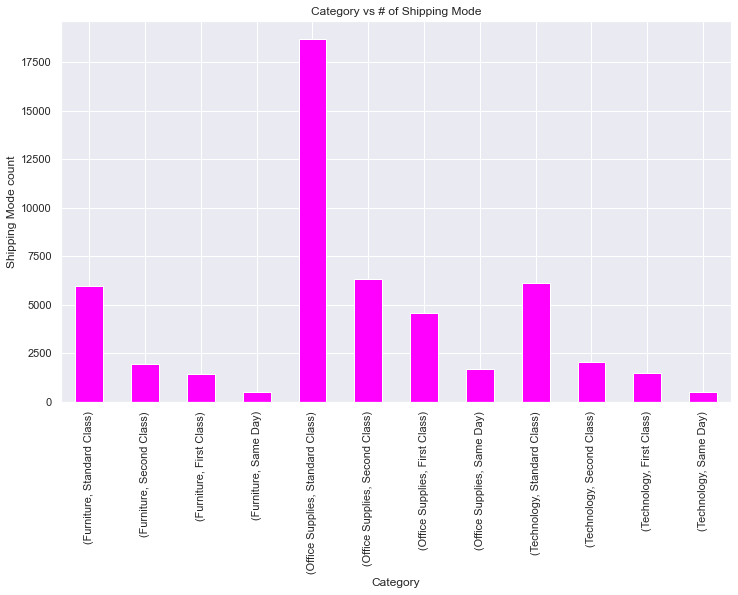

In [21]:
# visualize ship mode according to category

order_ship_mode = df.groupby('category')['ship_mode'].value_counts()
order_ship_mode.plot(kind = 'bar', figsize = (12,7), colormap = 'spring')
plt.title('Category vs # of Shipping Mode')
plt.xlabel('Category')
plt.ylabel('Shipping Mode count')
plt.show()

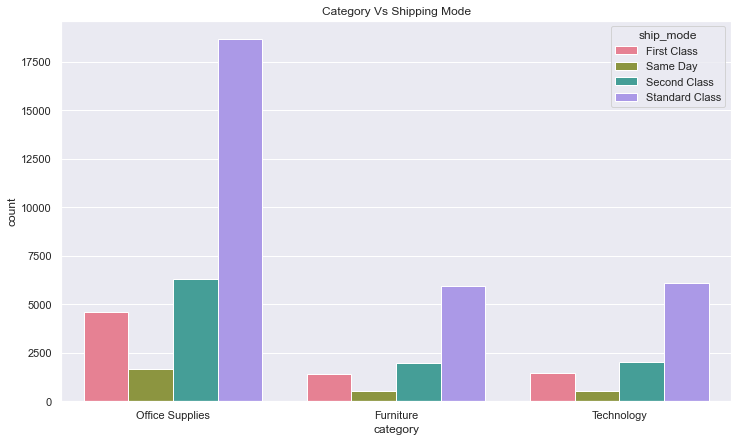

In [22]:
# let's visualize it with respect to category
plt.figure(figsize=(12,7))
sns.countplot(x = df['category'], hue = df['ship_mode'], palette='husl')
plt.title("Category Vs Shipping Mode")
plt.show()

Most of the shipping mode are standard shipping mode.

Now, let's check the average shipping cose per category.

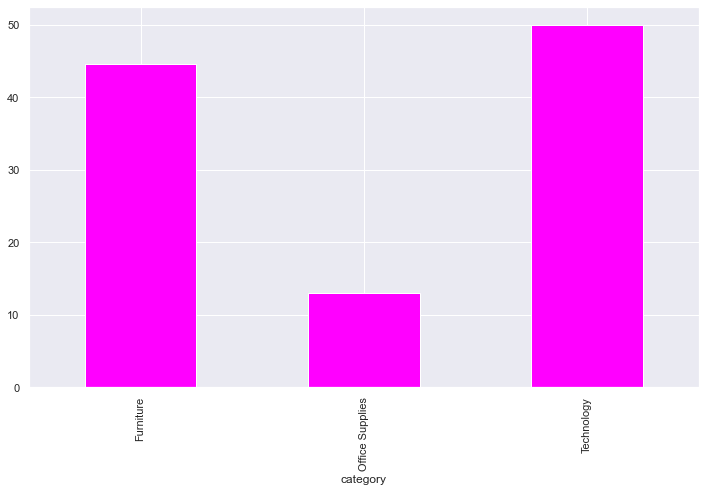

In [23]:
# average shipping cost per category

shipping_cost_cat = df.groupby('category')['shipping_cost'].mean()
shipping_cost_cat.plot(kind = 'bar', figsize = (12,7), colormap = 'spring')
plt.show()

Technology category has the highest average shipping cost. Let's check for the sub-category of this cost


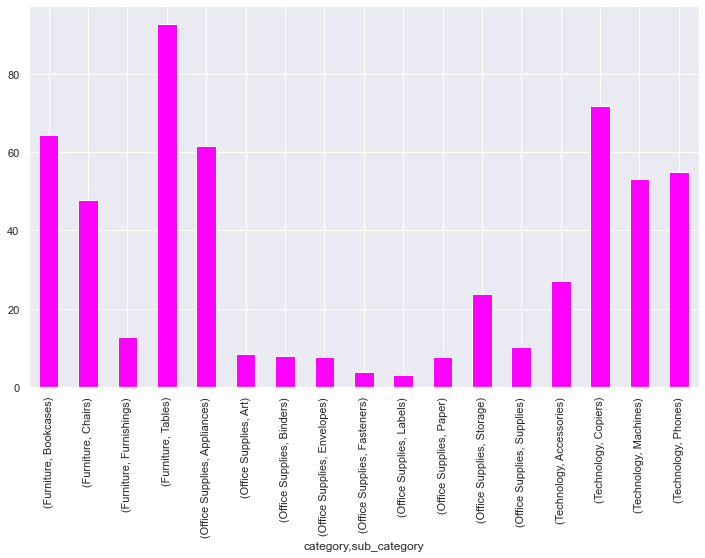

In [24]:
# average shipping cost per category

shipping_cost_sub_cat = df.groupby(['category','sub_category'])['shipping_cost'].mean()
shipping_cost_sub_cat.plot(kind = 'bar', figsize = (12,7), colormap = 'spring')
plt.show()

The Furniture (table) and Technology (coppiers) hhas the highest average shipping cost.

Now let's find the category wise discount and find which category and sub-category has highest average discount.

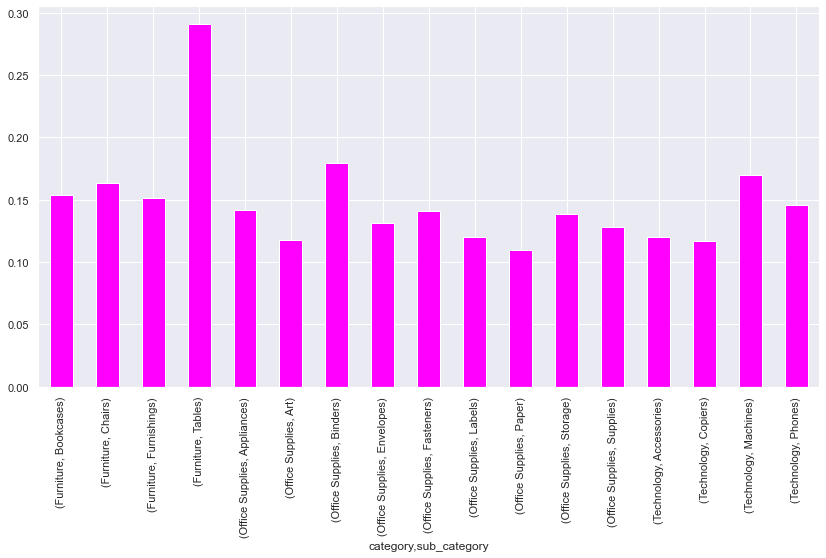

In [25]:
# let's find which category & subcategory products has more discount

dis_per_cat = df.groupby(['category','sub_category'])['discount'].mean()
dis_per_cat.plot(kind = 'bar', figsize = (14,7), colormap = 'spring')
plt.show()

#### Let's see the percentage of segments of the total and also 
#### which category contribute how much percentage

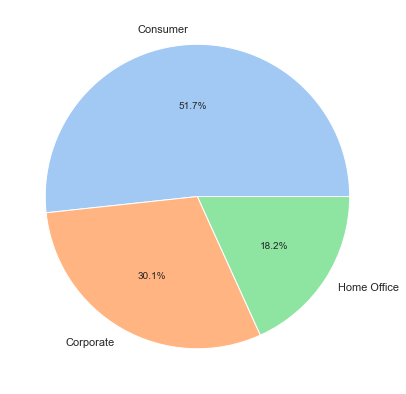

In [26]:
# segment

plt.figure(figsize=(12,7))
colors = sns.color_palette('pastel')[0:3]
plt.pie(df['segment'].value_counts(), labels = df['segment'].value_counts().keys(), autopct='%0.1f%%', colors = colors)
plt.show()

The biggest segment is consumer sector and then corpporate.
let's find which category products sold most & which sub-category

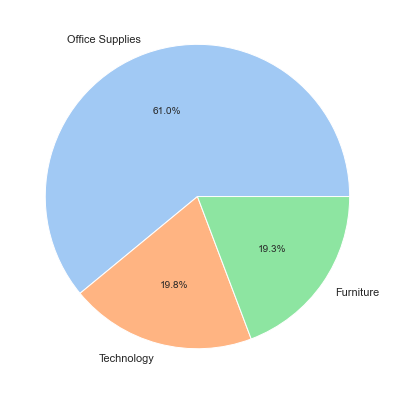

In [27]:
# category

plt.figure(figsize=(12,7))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['category'].value_counts(), labels = df['category'].value_counts().keys(), autopct='%0.1f%%', colors = colors)
plt.show()

Office supplies category products sold most

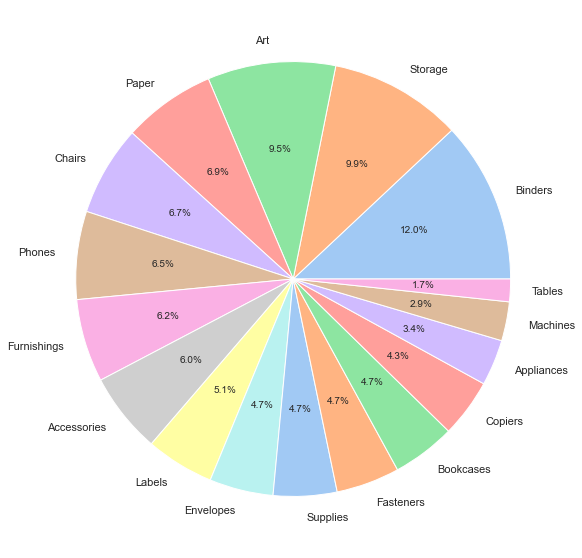

In [28]:
# sub-category

plt.figure(figsize=(15,10))
colors = sns.color_palette('pastel')[0:20]
plt.pie(df['sub_category'].value_counts(), labels = df['sub_category'].value_counts().keys(), autopct='%0.1f%%', colors = colors)
plt.show()

Binders sub-category has highest quantity sold

Like average shipping cost the "Table" sub-category has the highest discount over those years.

### Now let's find the average lead_time (order_date - ship_date)

In [29]:
# For this first let's calculate the lead time and create a new column "lead_time"

df['lead_time'] = df['order_date'] - df['ship_date']
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,lead_time
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,-151 days
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,-212 days
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,-120 days
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,-120 days
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,-212 days


We've added a new column "lead_time".
There has a negative (-) sign this is because the ship_date is later of the order_date.


In [30]:
# let's check the maximum and minimum lead_time

max_lead = df['lead_time'].sort_values(ascending= False)
min_lead = df['lead_time'].sort_values(ascending= True)

print('Max lead time: {}'.format(max_lead.head(1)))
print('\n')
print('Min lead time: {}'.format(min_lead.head(1)))

Max lead time: 18583   322 days
Name: lead_time, dtype: timedelta64[ns]


Min lead time: 37689   -214 days
Name: lead_time, dtype: timedelta64[ns]


Here the maximum lead time show 322 days and minimum lead time is -214 days.

Here the (-) is usual for this case if there is any positive (+) sign that is not correct. Because shipping can't be happen before order. Let's take care of this

 This problem may happen because the order date & ship date may alter their position while entering the data.
 
 First let's check how many data has this problem.

In [31]:
# Here 9687 rows has this problem. Let's take care of this

lead_prob = df[df['lead_time'] > np.timedelta64(0,'s')]
lead_prob.shape

(9687, 22)

In [32]:
# Let's take care of this.
# first let's capture only the number by removing 'days'


df['lead_time'] = df['lead_time'].astype(str)  # convert the data type into string
data = df['lead_time'].str.split(' ', n  = 1, expand = True) # spliting the number and "days"
df['lead_times'] = data[0] # adding new column "lead_time" with only number
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,lead_time,lead_times
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,-151 days,-151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,-212 days,-212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,-120 days,-120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,-120 days,-120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,-212 days,-212


In [33]:
# we've added a new column 'leads time' that contain only the number of lead days
# now let's remove the lead time column to reduce number of column
df.drop('lead_time', inplace = True, axis = 1)

In [34]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,lead_times
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,-151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,-212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,-120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,-120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,-212


In [35]:
# now let's convert the leads_time data type into float and then turn the positive value into negative. For matching
# order and ship date

df['lead_times'] = df['lead_times'].astype(float)

In [36]:
# let's use abs() method to just take the time duraion

df['lead_times'] = abs(df['lead_times'])

In [37]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,lead_times
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,151.0
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,212.0
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,120.0
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,120.0
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,212.0


we've sort out only the number by removing days and negative sign. Now we've only the lead time

Now let's visualize the relation between category sub-category and lead time.
And order_priority with mean lead_time

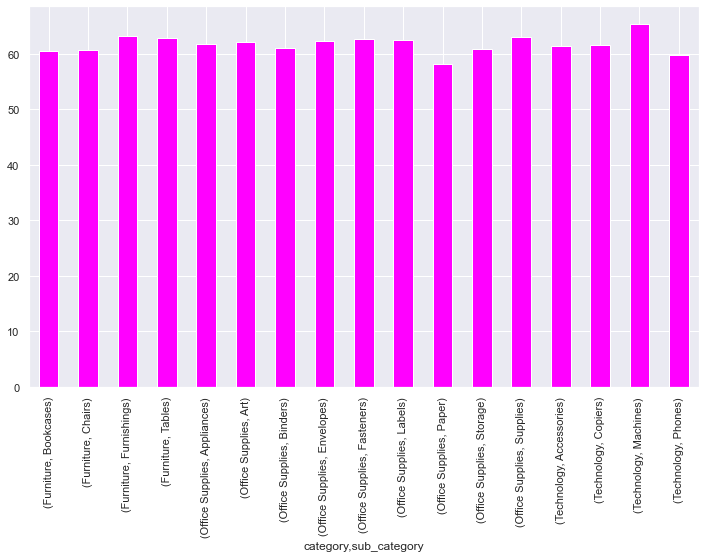

In [38]:
# finding relation between category, sub-categor and the mean lead_time
cat_lead_time = df.groupby(['category', 'sub_category'])['lead_times'].mean()
cat_lead_time.plot(kind = 'bar', figsize = (12,7), colormap = 'spring')
plt.show()

The technnology (macchines) has the highest lead time.

let's see for order priority

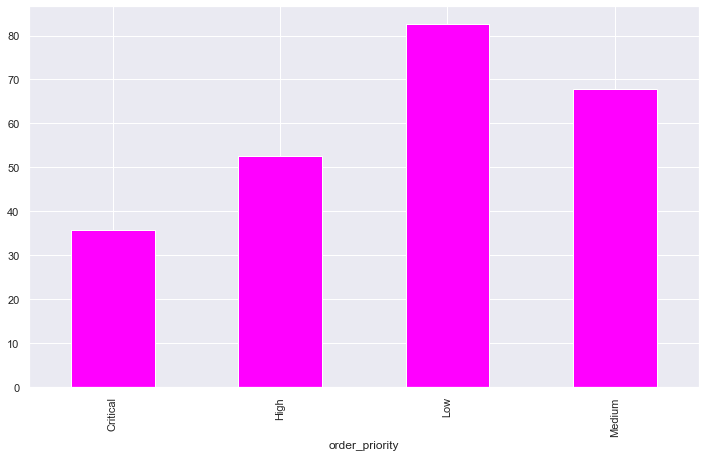

In [39]:
# relation between order_priority and lead times
order_lead_time = df.groupby('order_priority')['lead_times'].mean()
order_lead_time.plot(kind = 'bar', figsize = (12,7), colormap = 'spring')
plt.show()

This is ok. Because the critica priority must have a minimun lead time

### Now let's find which countries are the highest consumer. 
For this we'll take top 10 countries

In [40]:
# let's find the top 10 consumer
top_country = df['country'].value_counts()[0:10].keys()
top_con =df['country'].value_counts()[0:10].values

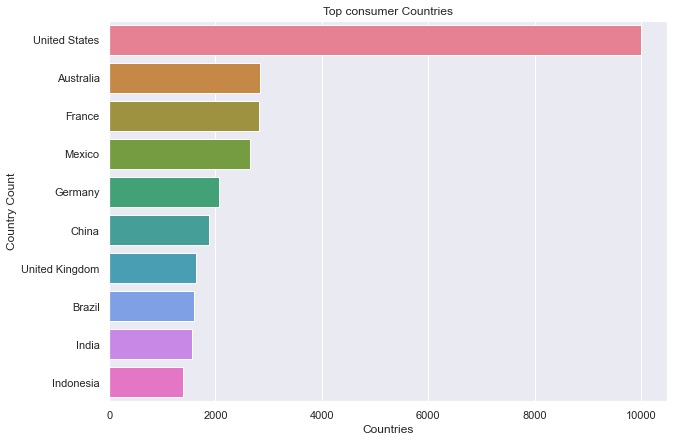

In [41]:
# let's plot the graph and find  which country consumes most

plt.figure(figsize=(10,7))
top_countries = top_country
top_country_count = top_con
sns.barplot(x = top_country_count, y =top_countries, orient= 'h', palette= 'husl')
plt.title('Top consumer Countries')
plt.xlabel('Countries')
plt.ylabel('Country Count')
plt.show()

We can clearly see that united state is the most consumer country in the world

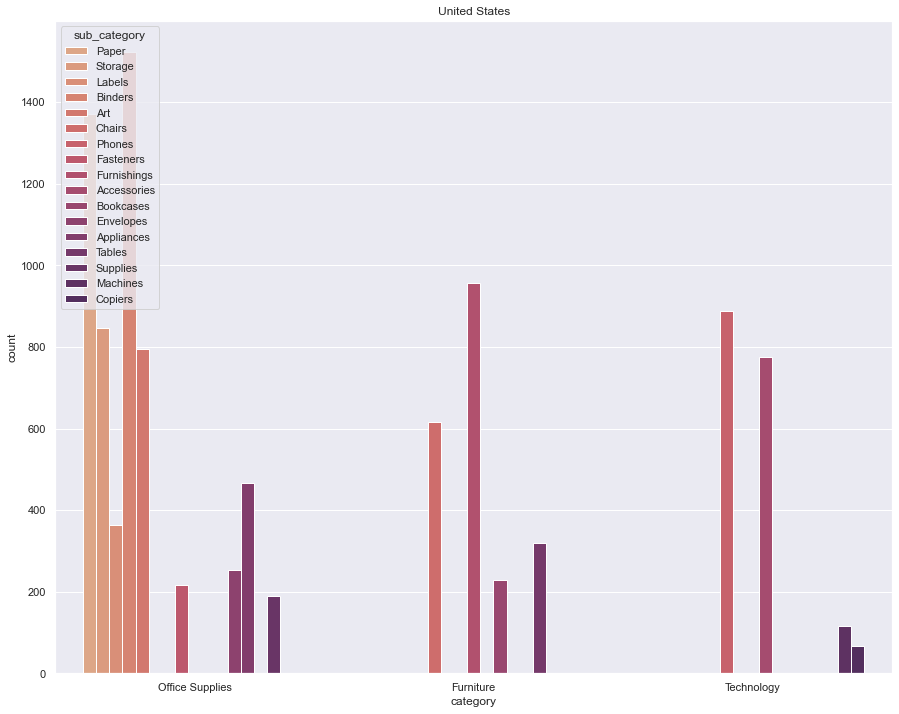

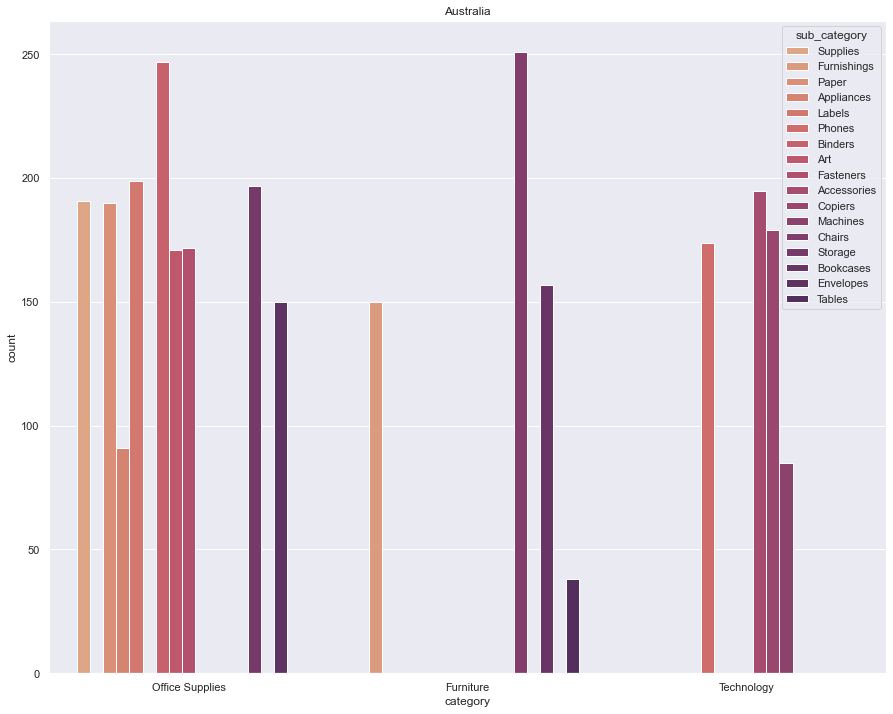

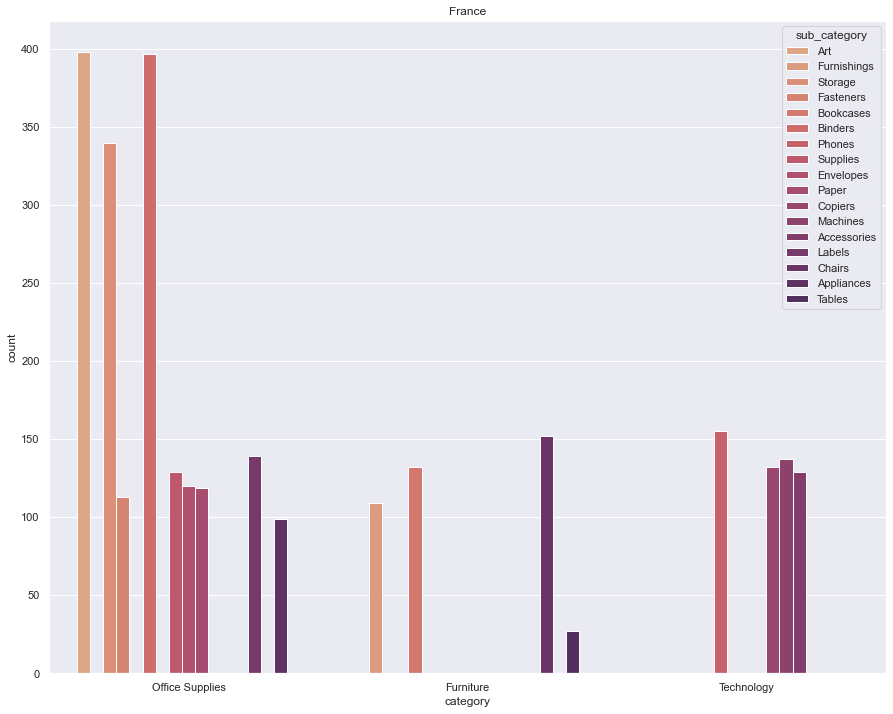

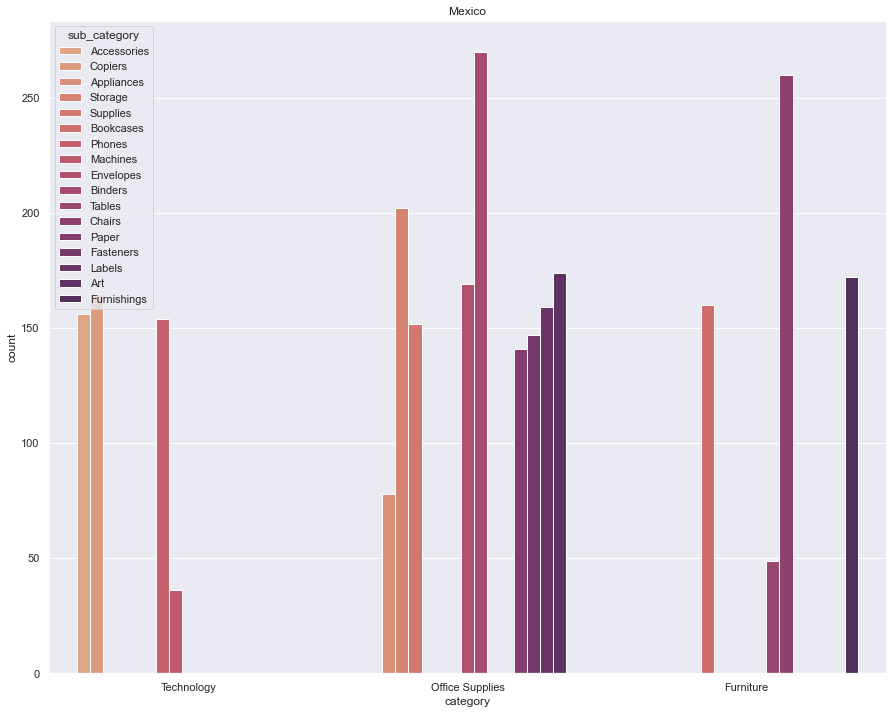

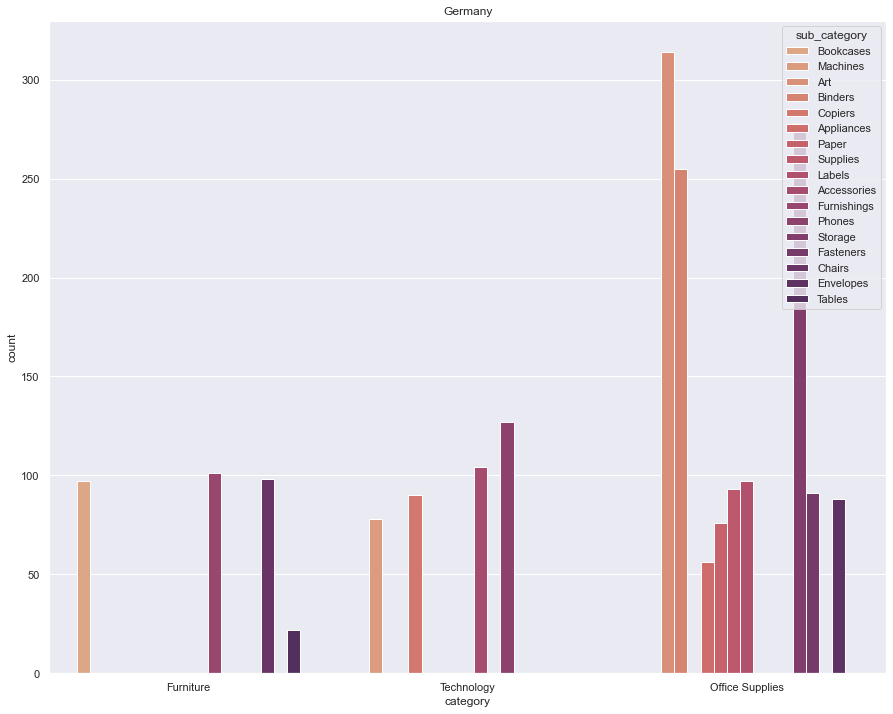

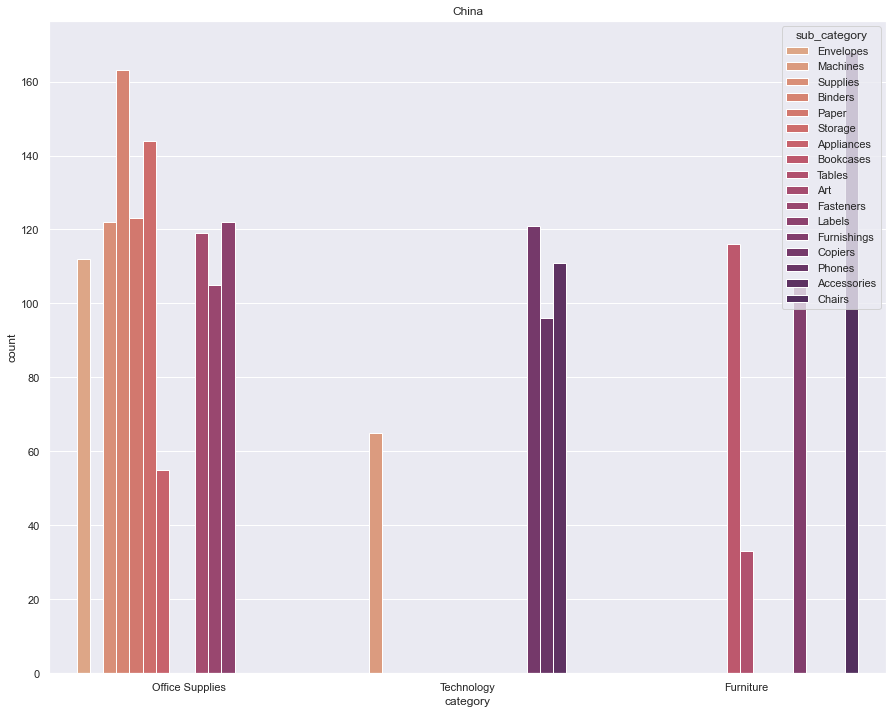

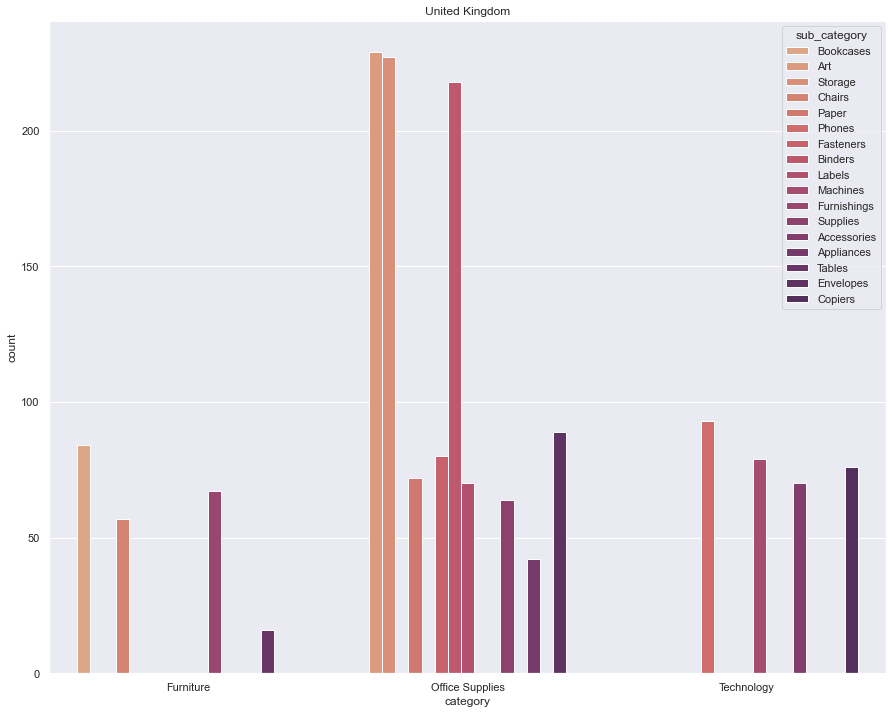

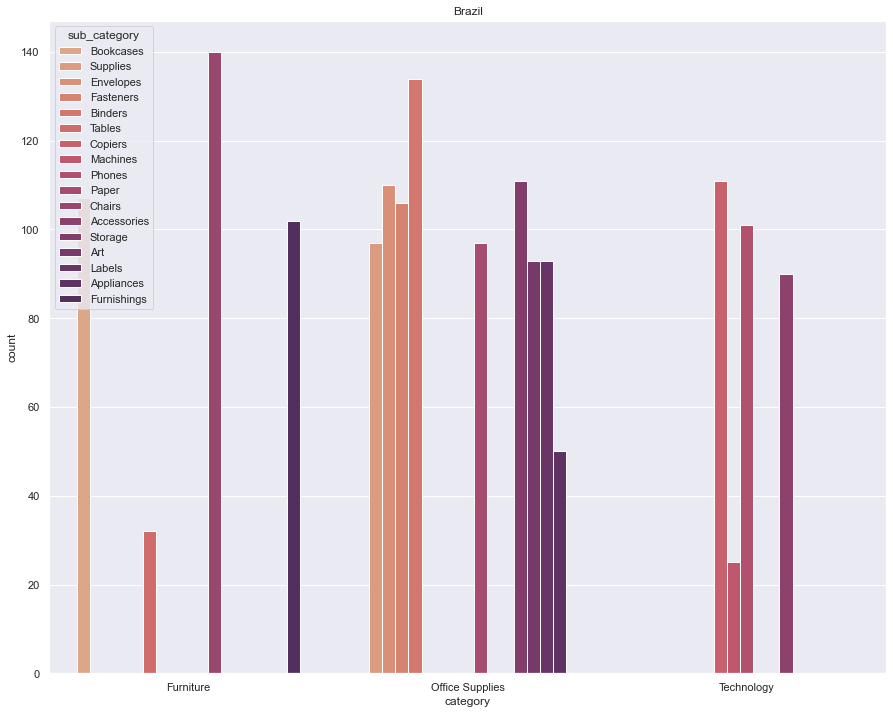

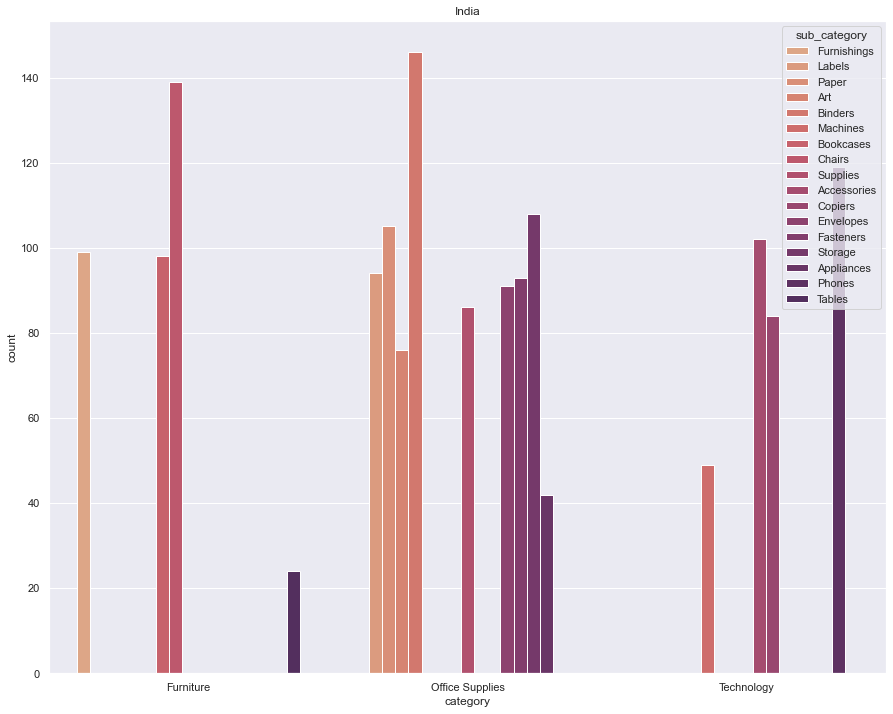

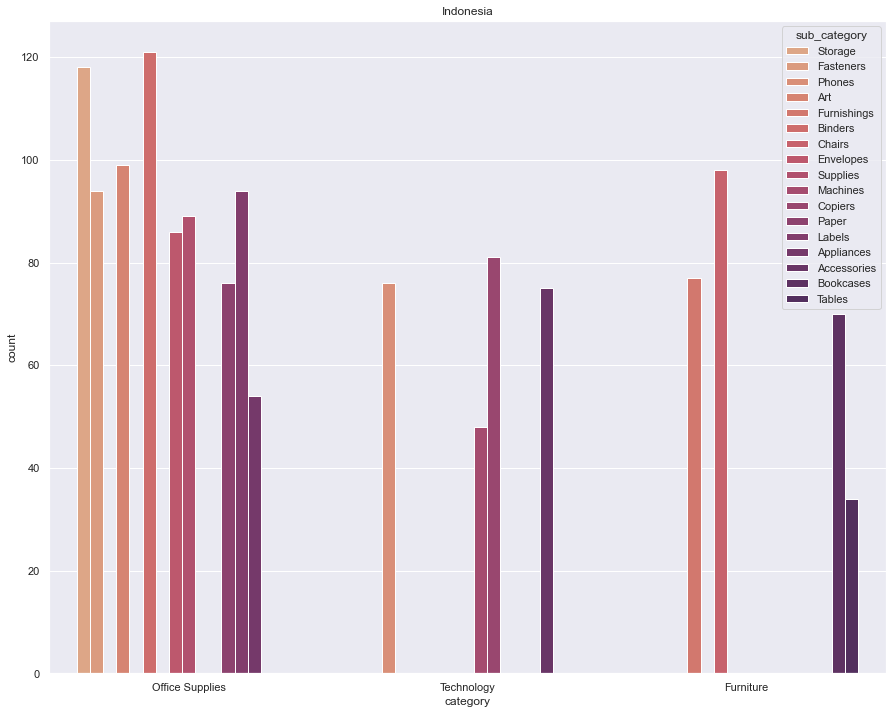

In [42]:
# let's visualize which category and sub-category products these countries consume most

for country in top_country:
    country_list=df[df["country"]==country]
    plt.figure(figsize=(15,12))
    plt.title(country)
    plt.xlabel('Category / Subcategory')
    plt.ylabel('Nunber of counts')
    sns.countplot(x = country_list["category"], hue = country_list["sub_category"], palette='flare')
    plt.show()

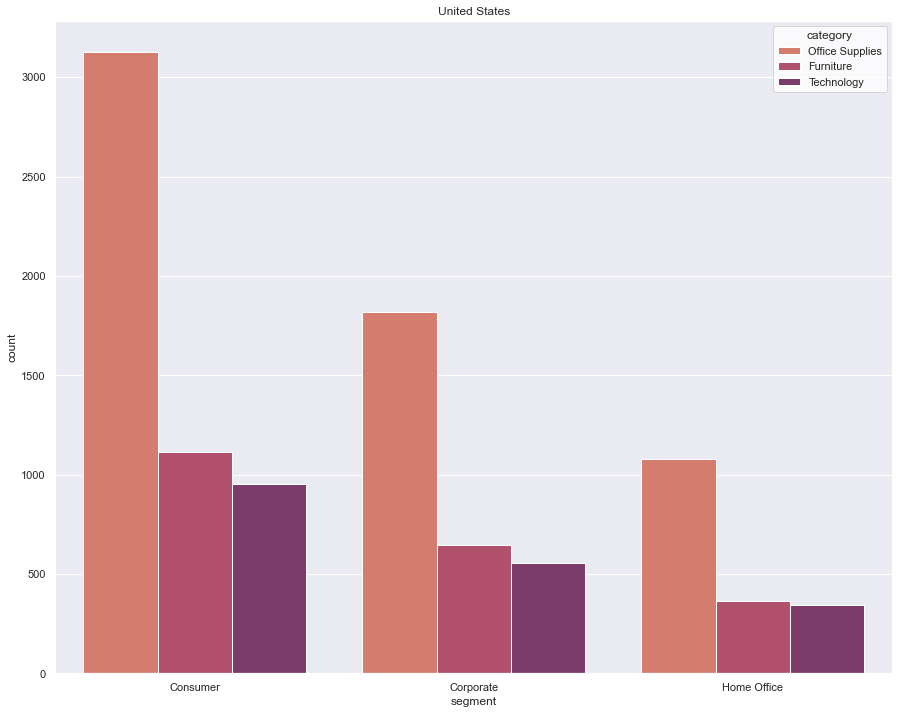

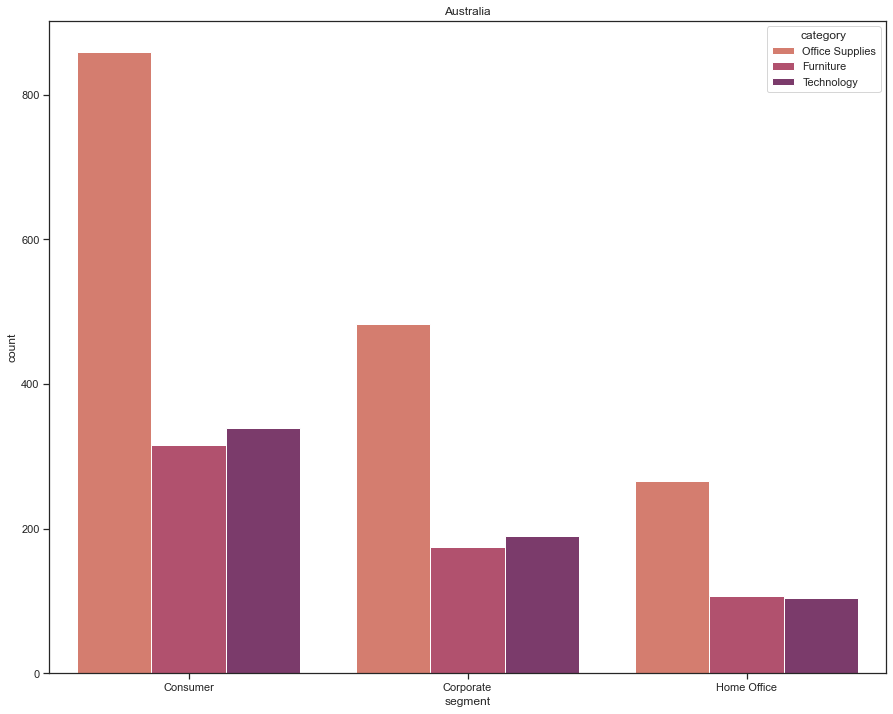

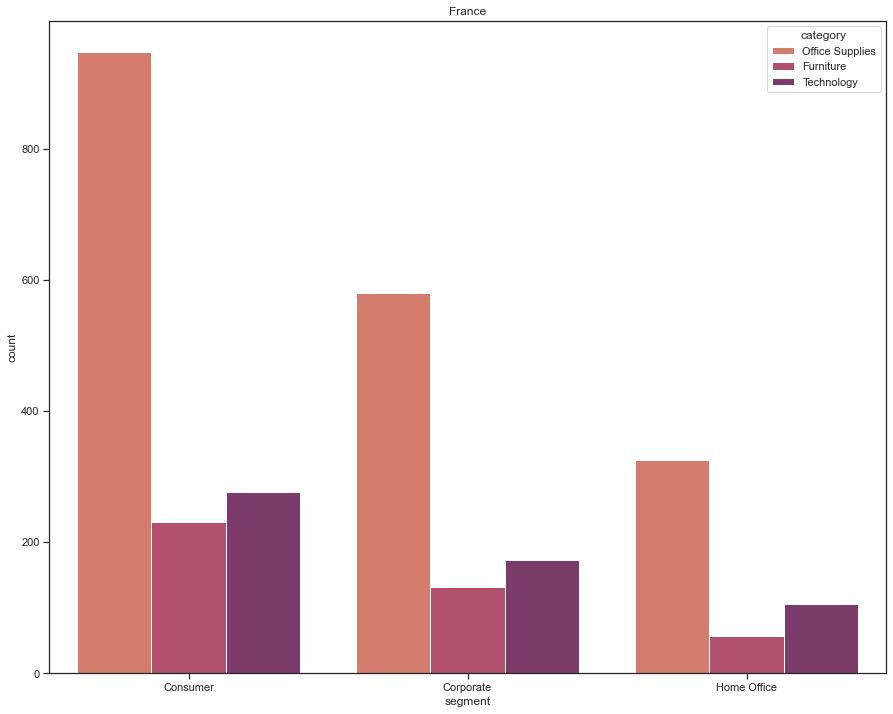

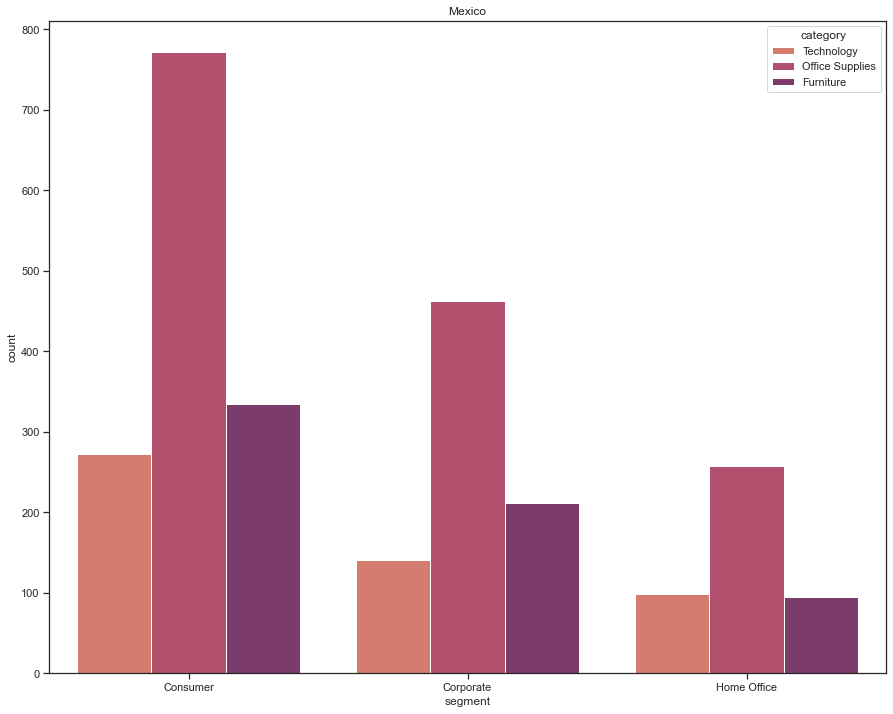

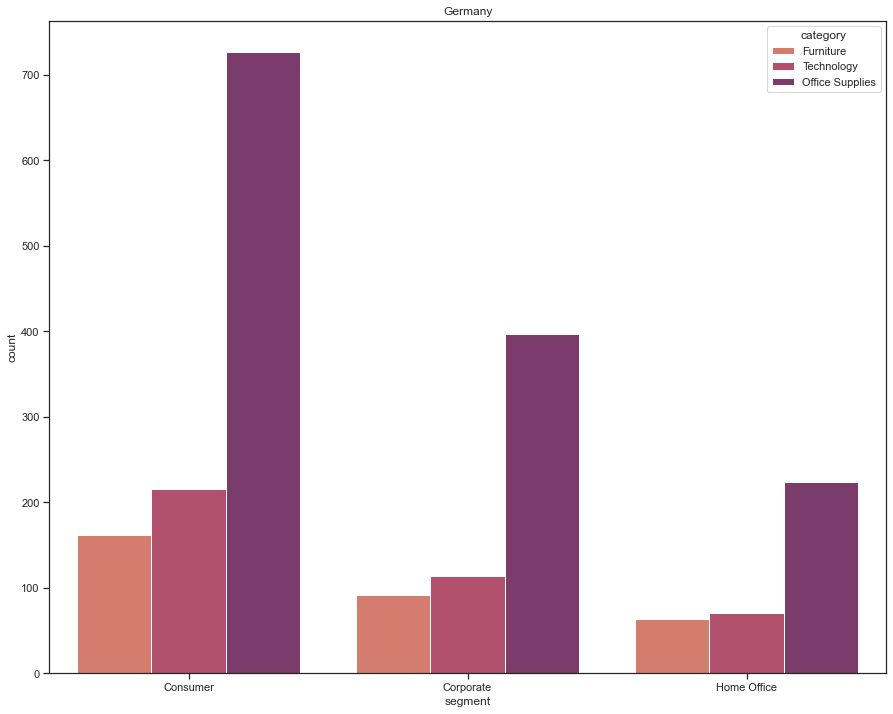

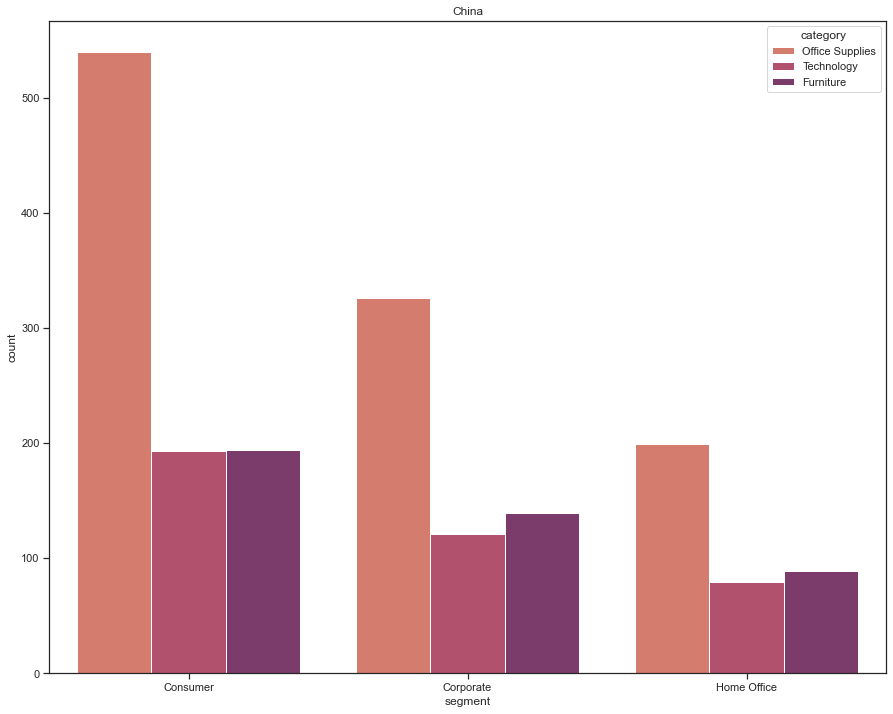

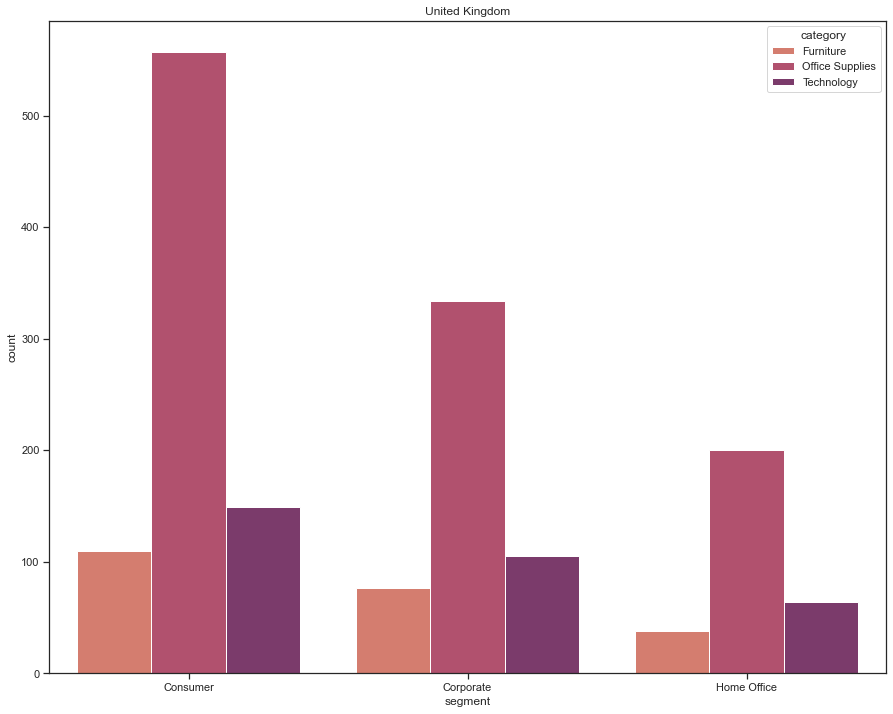

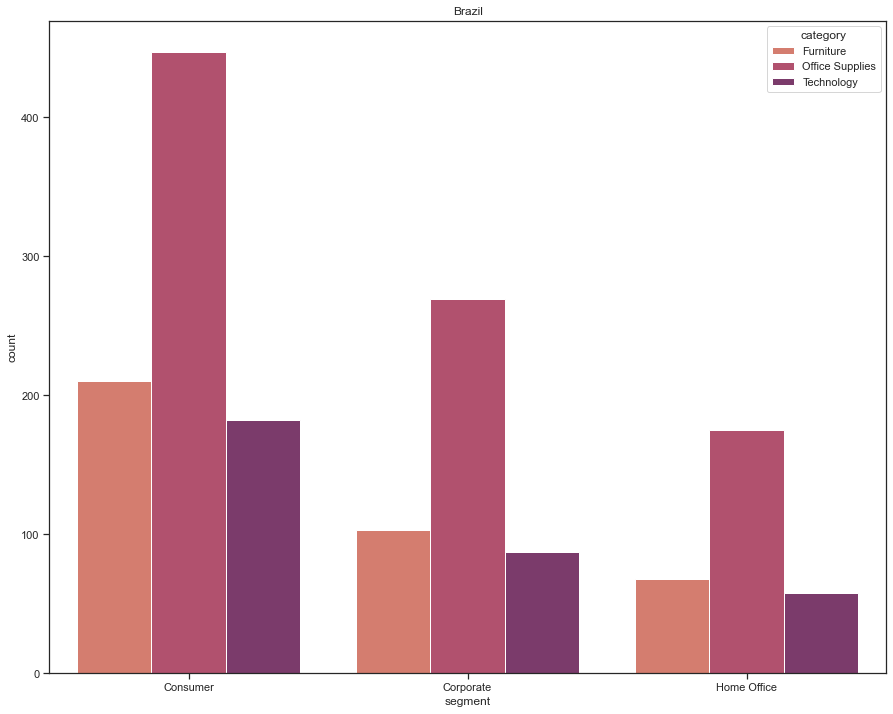

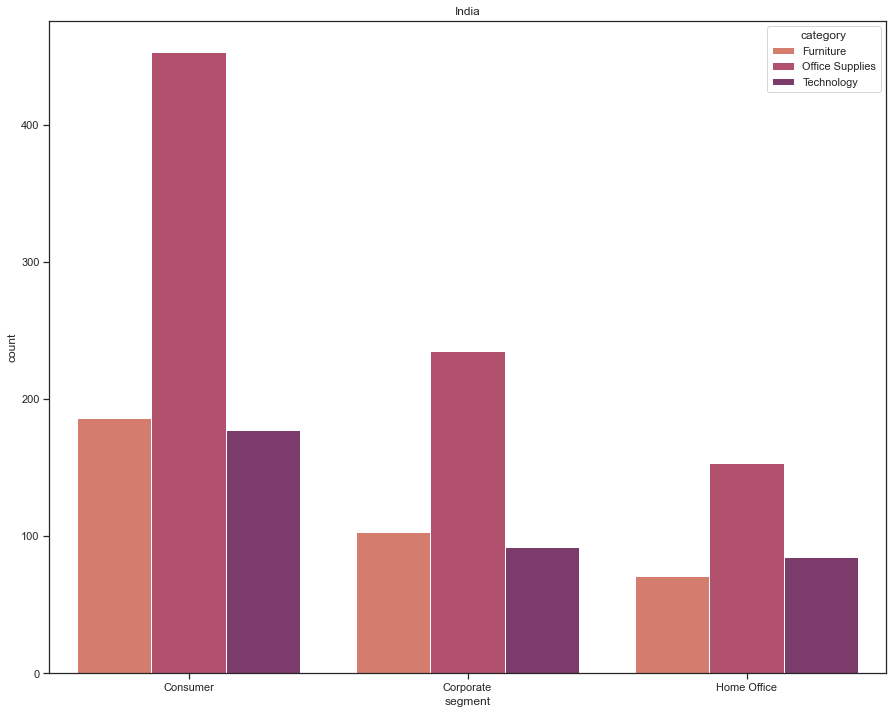

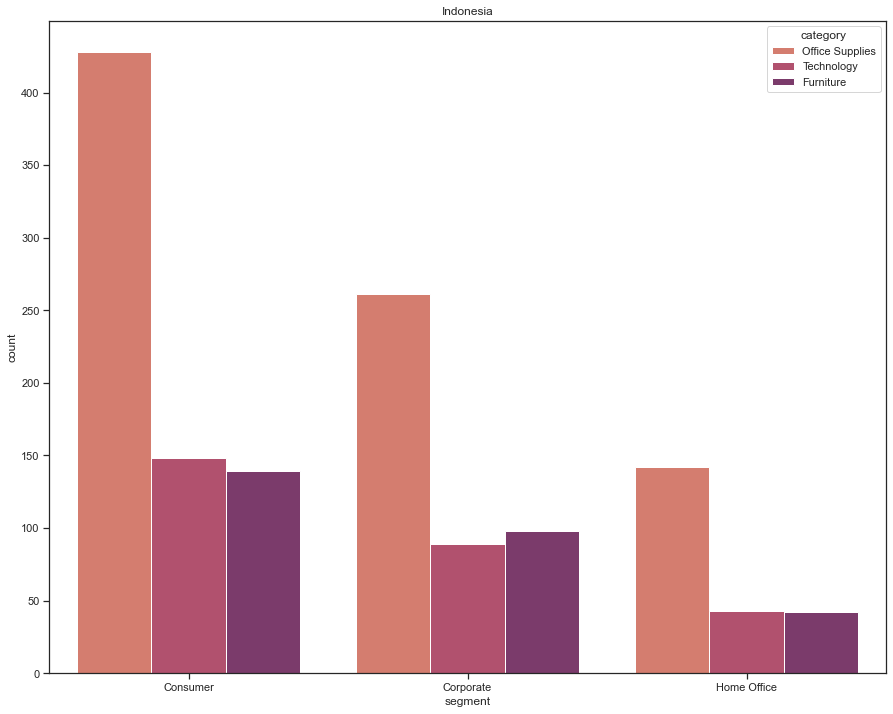

In [43]:
# Now let's see these top countris according to segments and category


for country in top_country:
    country_list=df[df["country"]==country]
    plt.figure(figsize=(15,12))
    plt.title(country)
    sns.set_theme(style="ticks")
    sns.countplot(x = country_list["segment"], hue = country_list["category"], palette='flare')
    plt.show()

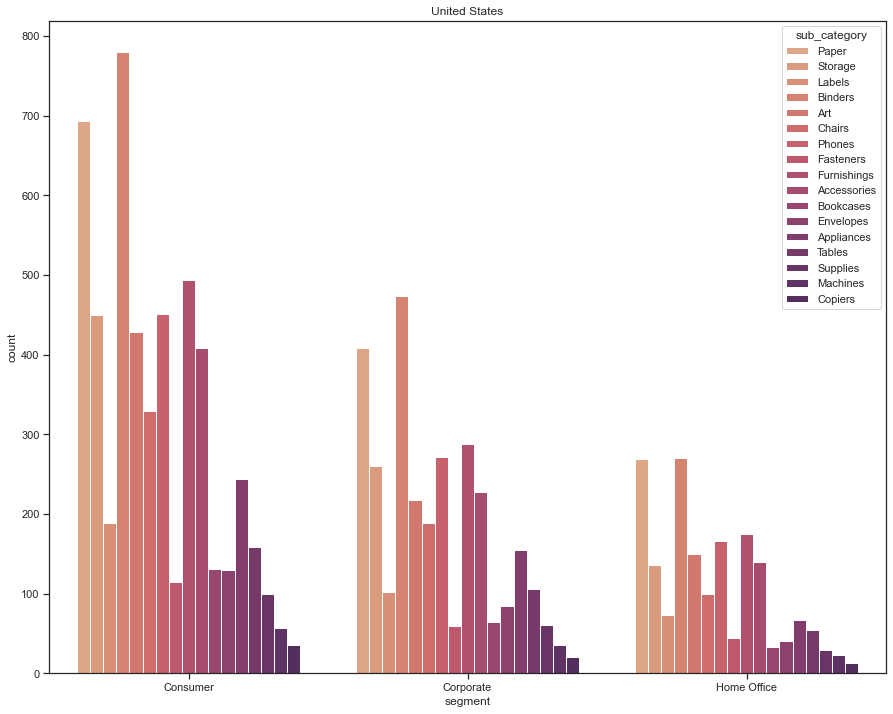

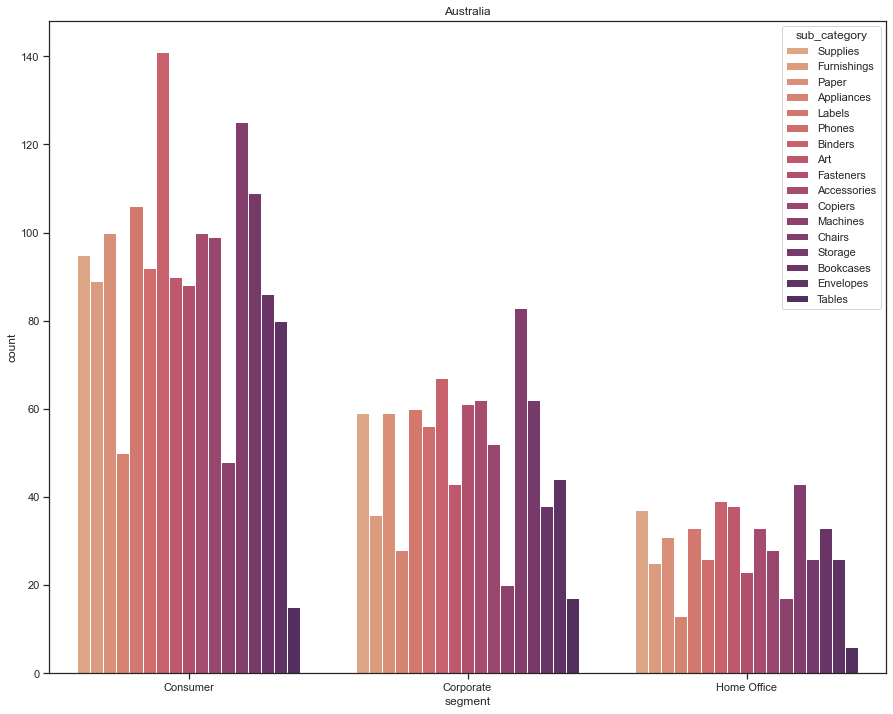

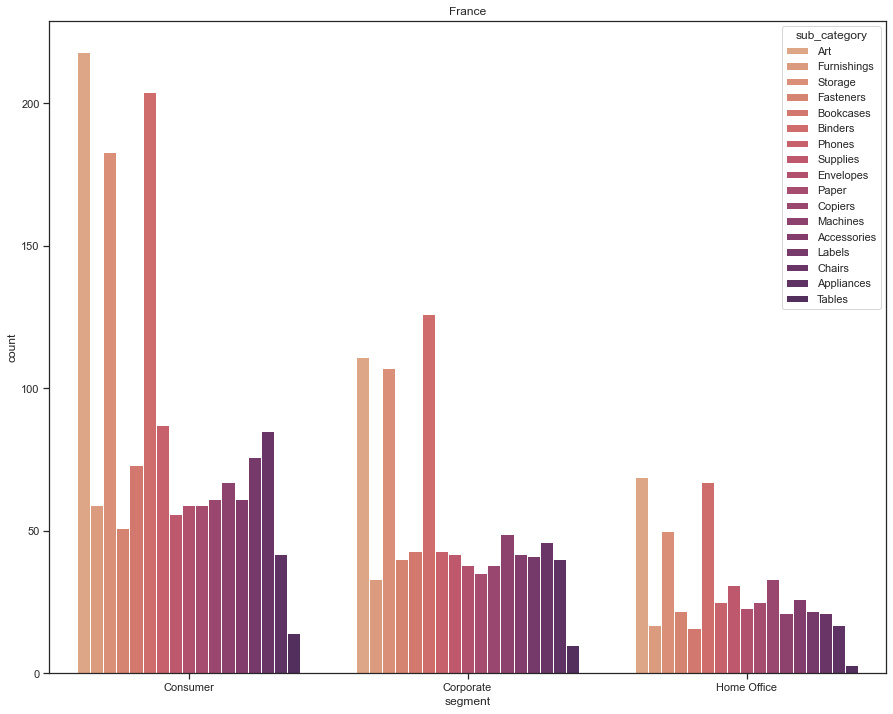

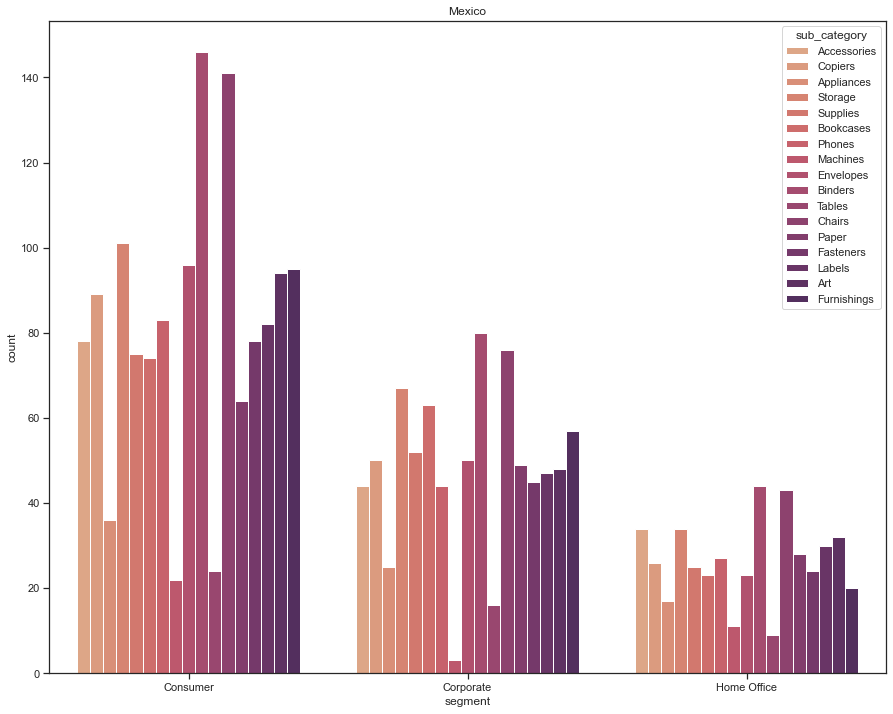

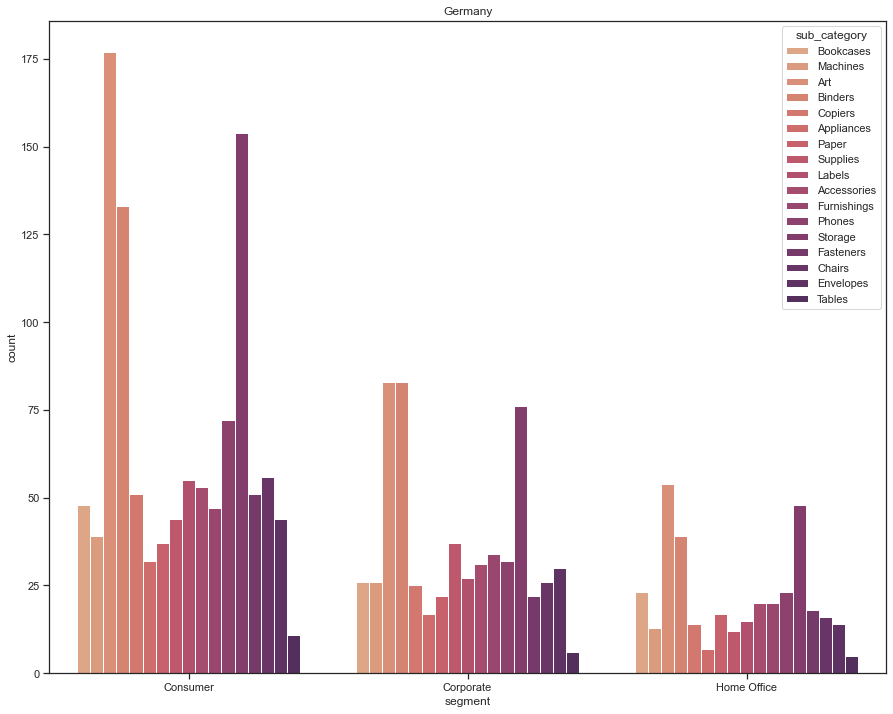

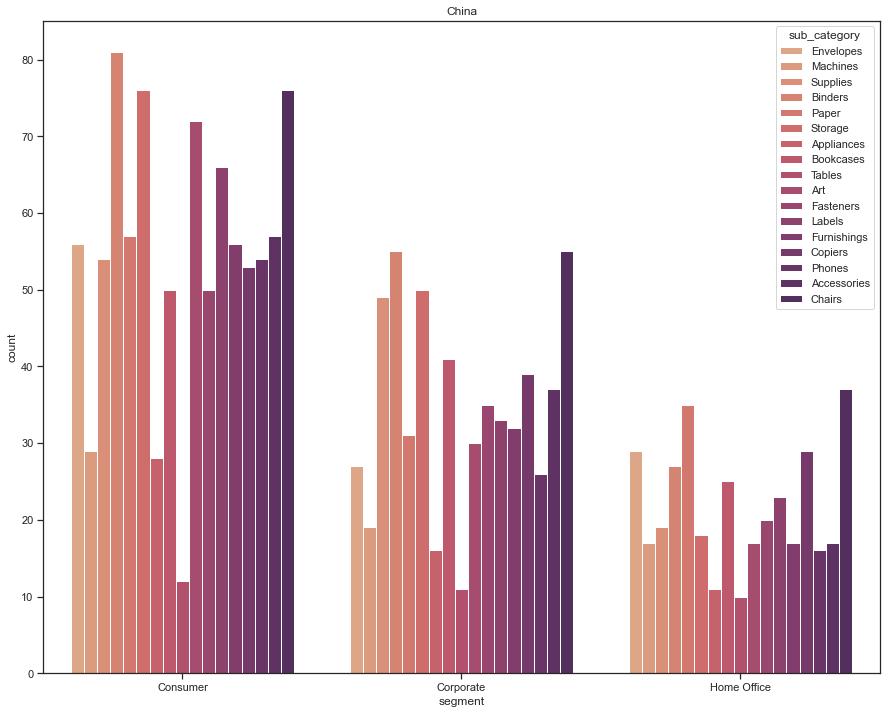

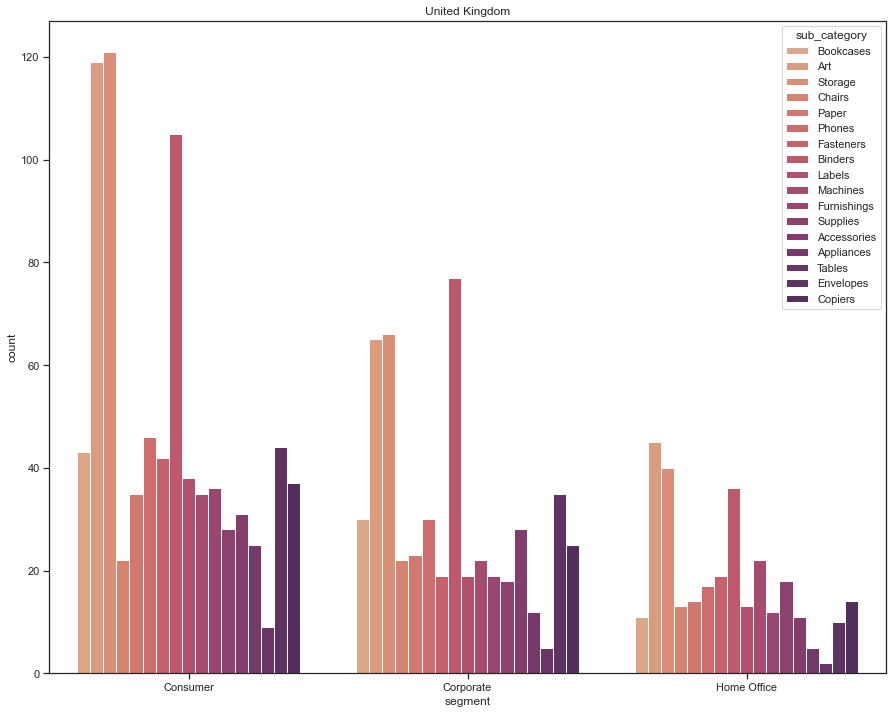

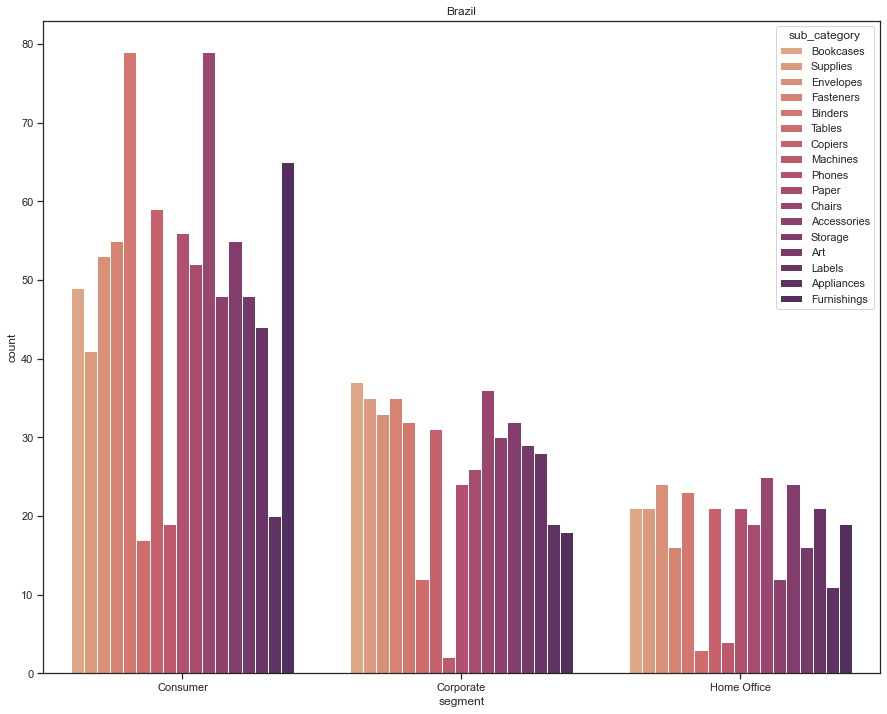

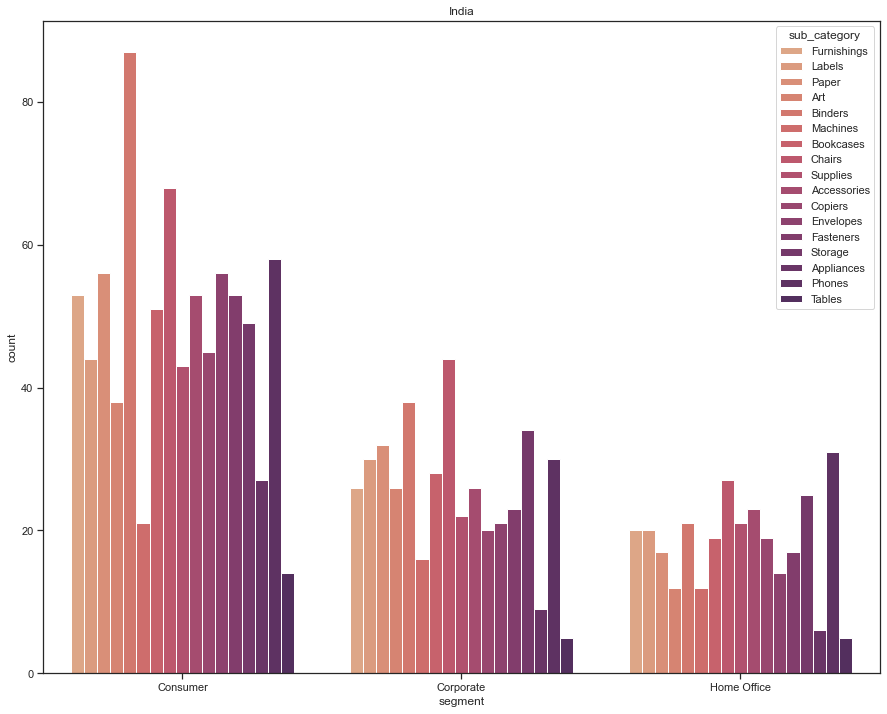

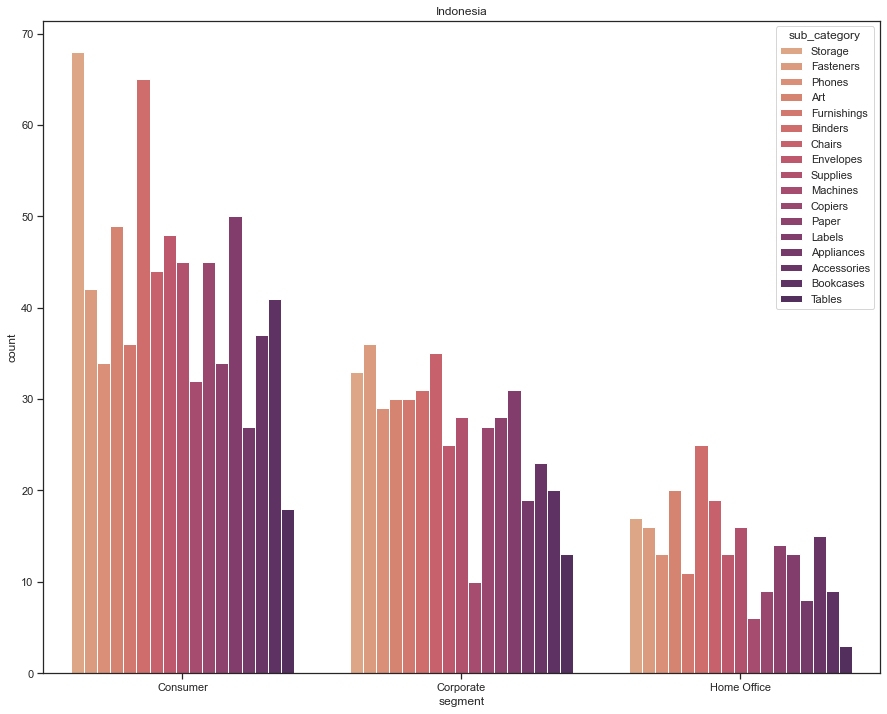

In [44]:
# let's analyze top 10 countris according to the segment & sub-category

for country in top_country:
    country_list=df[df["country"]==country]
    plt.figure(figsize=(15,12))
    plt.title(country)
    sns.set_theme(style="ticks")
    sns.countplot(x = country_list["segment"], hue = country_list["sub_category"], palette= "flare")
    plt.show()

## From this analysis we found some useful insight. US is the most consumer country in the world and delivery time always depends on the priority of the order and also found some info about the markets of different regions.